# Regression
- Target values are continuous values.
- Trong m√¥ h√¨nh regression c·∫ßn check __variable magnitude__ --> need to scaling features

## Linear model

**Assumption**

N·∫øu tho·∫£ m√£n c√°c assumption d∆∞·ªõi ƒë√¢y th√¨ coef v√† params c·ªßa regression s·∫Ω kh√¥ng b·ªã bias v√† m√¥ h√¨nh ch√≠nh x√°c, c√≤n vi ph·∫°m th√¨ n√™n xem x√©t s·ª≠ d·ª•ng non-linear model ho·∫∑c s·ª≠ d·ª•ng transform feature engineer ho·∫∑c remove outliers:
- ___Linearity___: There is a linear relationship between predictors and target
- ___No perfect multicollinearity___: there are no perfect /high linear relationship between 2 or more of the predictors
- ___Normally distributed errors___: The residuals are random and normally distributed with a mean of 0
- ___Homoscedasticity___: at each level of the predictor variables, the variance of the error should be constant
- ___No Auto Correlation___: trong time-series model, C√°c bi·∫øn Y √≠t c√≥ t∆∞∆°ng quan v·ªõi nhau, ki·ªÉm ƒë·ªãnh th√¥ng qua Durbin-Watson statistic

**Types of Linear models**
- Linear regression
- Ridge/Lasso regression
- Logistic regression
- Linear discriminant analysis - LDA

**Evaluate model performance**
- Ki·ªÉm tra xem c√≥ linear relationship between X and Y, X and other X
- Ki·ªÉm ƒë·ªãnh auto-correlation b·∫±ng Durbin-Watson statistic
- Variance inflation factor (VIF) ƒë·ªÉ check multi-collinearity
    - C√°c bi·∫øn lu√¥n c√≥ t∆∞∆°ng quan √≠t nhi·ªÅu v·ªõi nhau, khi hai bi·∫øn c√≥ t∆∞∆°ng quan l·ªõn v·ªõi nhau s·∫Ω l√†m gi·∫£m m·ª©c ƒë·ªô tin c·∫≠y c·ªßa weight c·ªßa c√°c bi·∫øn ƒë√≥, t√≠nh gi·∫£i th√≠ch cho bi·∫øn ph·ª• thu·ªôc c√†ng √≠t √Ω nghƒ©a. Do khi bi·∫øn A thay ƒë·ªïi th√¨ s·∫Ω t√°c ƒë·ªông tr·ª±c ti·∫øp ƒë·∫øn bi·∫øn B, t·ª´ ƒë√≥ m·ªõi t√°c ƒë·ªông ƒë·∫øn Y, ch·ª© A ko t√°c ƒë·ªông tr·ª±c ti·∫øp ƒë·∫øn bi·∫øn Y.
- Thi·∫øu c√°c bi·∫øn quan tr·ªçng, gi·∫£i th√≠ch t·ªët cho bi·∫øn Y trong model
- Ki·ªÉm tra residuals distribution with zero-mean normal by Q-Q plot, or KS-test
- Ngo√†i vi·ªác x√°c ƒë·ªãnh outliers t·ª´ sample th√¨ detect outliers th√¥ng qua s·ª± kh√°c bi·ªát gi·ªØa y_real v√† y_predicted theo `standardized residual` = `error` / `SE`
- Ph√¢n t√≠ch ·∫£nh h∆∞·ªüng c·ªßa high_leverage obs (Influential observations), h·ªó tr·ª£ x√°c ƒë·ªãnh anomaly, c√°c pp:
    - hat-value > 2(p+1)/n
    - Cook's distance > 4/(n-p-1)

<AxesSubplot: >

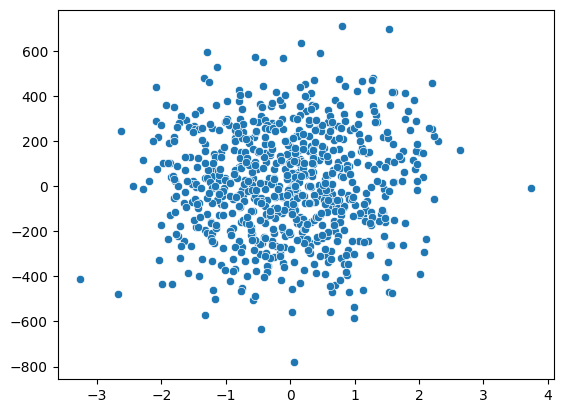

In [68]:
# make data
import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, n_features=25, n_informative= 15, bias= 1, noise=50, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
sns.scatterplot(x = X_train[:,-1], y = y_train)

### OLS
- Minimize the `RSS` (sum of square of error)

$$RSS(\beta) = \sum_{i=1}^{n}(y_i - \hat{y_i})^2$$

where $RSS(\beta)$ is the residual sum of squares, $y_i$ is the dependent variable, $\beta_0$ is the intercept, $\beta_j$ are the regression coefficients, $x_{ij}$ are the independent variables, $n$ is the number of observations, $p$ is the number of independent variables, and $\lambda$ is the penalty parameter. The penalty term $\lambda\sum_{j=1}^{p}|\beta_j|^2$ is added to the OLS regression model to prevent overfitting and to encourage sparsity in the regression coefficients.

In [55]:
from sklearn import linear_model
reg = linear_model.LinearRegression(
         positive=False  # if Target y is positive, then set True
            )
reg.fit(X_train, y_train)

# R-squared score
reg.score(X_test, y_test)

0.8257897856095553

### Lasso Regression

Minimize `RSS_Lasso` :
$$\operatorname*{min}_{w}{\frac{1}{2n_{\mathrm{samples}}}}||X w-y||_{2}^{2}+\alpha||w||_{1} $$

where $\alpha$ is the regularization parameter

- Lasso gi·ªëng OLS nh∆∞ng th√™m ph·∫ßn `L1 Regularizations`penalty, `L1 Regularizations`penalty gi√∫p model gi·∫£m thi·ªÉu b·ªã over-fitting v√† t√≠nh ph·ª©c t·∫°p c·ªßa model m·∫°nh m·∫Ω h∆°n `L2 Regularizations` penalty, S·ª≠ d·ª•ng `absolute of weights` , hay c√≤n g·ªçi l√† `L1` regularization penalty
- `alpha` c√†ng cao th√¨ more regularizations , t·ª©c l√† model c√†ng gi·∫£m m·∫°nh t√≠nh over-fitting
- L1 Regularizationspenalty : gi·∫£m overfit m·∫°nh h∆°n L2
- M√¥ h√¨nh Lasso gi·∫£m s·ª± ph·ª©c t·∫°p cho model, n√™n s·∫Ω estimate ra nhi·ªÅu `w(i)` = 0 h∆°n.
- **Lasso Ph√π h·ª£p h∆°n khi √°p d·ª•ng cho model t·∫°o ra √≠t s·ªë l∆∞·ª£ng feature nh∆∞ng m·ªói feature c√≥ high effect so v·ªõi Ridge**

Lasso

In [56]:
reg = linear_model.Lasso(
    alpha=0.1,
    positive=False  # if Target y is positive, then set True
)
reg.fit(X_train, y_train)

# R-squared score
reg.score(X_test, y_test)

0.8259036390894249

LassoCV

In [57]:
# using LassoCV khi d·ªØ li·ªáu nhi·ªÅu chi·ªÅu high - dimensional datasets
reg = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)

# R-squared score
print('alpha = ', reg.alpha_)

# R-squared score
reg.score(X_test, y_test)

alpha =  1.0


0.8266707896044623

LassoLarsCV

In [58]:
# using LassoLarsCV khi d·ªØ li·ªáu nhi·ªÅu chi·ªÅu high n_features v√† √≠t quan s√°t low n_samples (nh·ªè h∆°n s·ªë n_features)
# LassoLarsCV is based on the Least Angle Regression algorithm.
reg = linear_model.LassoLarsCV()
reg.fit(X_train[:30], y_train[:30])

# R-squared score
print('alpha = ', reg.alpha_)

# R-squared score
reg.score(X_test, y_test)

alpha =  4.327832825318372


0.5948759288127505

__Model Selection__


1. For a linear Gaussian model, the maximum log-likelihood is defined as:
$$\log(\hat{L})=-\frac{n}2\mathrm{log}(2\pi)-\frac{n}2\mathrm{ln}(\sigma^{2})-\frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{2\sigma^{2}}$$
where $\sigma^{2}$ is an estimate of the `noise variance` and $n$ is the number of samples.

`noise variance` = $\sigma^{2}={\frac{\sum_{i=1}^{n}(y_{i}-{\hat{y}}_{i})^{2}}{n-p}}$

2. AIC and BIC
$$AIC=-2\log(\hat{L})+2d$$

$$BIC=-2\log(\hat{L})+\log(N)d$$

where $d$ is the number of parameters (degree of freedom).

LassoLarsIC

In [59]:
# LassoLarsIC ∆∞·ªõc l∆∞·ª£ng minimize AIC v√† BIC ƒë·ªÉ l√†m ph∆∞∆°ng ph√°p model selection
# BIC ph·∫°t n·∫∑ng h∆°n s∆° v·ªõi AIC
# LassoLarsIC t√≠nh to√°n nh·∫π h∆°n so v·ªõi LassoCV do ch·ªâ t√≠nh to√°n 1 l·∫ßn thay v√¨ k+1 l·∫ßn cho k-fold CV
reg = linear_model.LassoLarsIC()
reg.fit(X_train, y_train)

# R-squared score
print('alpha = ', reg.alpha_)

# R-squared score
reg.score(X_test, y_test)

alpha =  2.4756569894173026


0.8264705204381142

### Ridge Regression

Minimize `RSS_Ridge` :
$$ \operatorname*{min}_{w}||X w-y||_{2}^{2}+\alpha||w||_{2}^{2} $$
where $\alpha$ is the regularization parameter

- Ridge gi·ªëng OLS nh∆∞ng th√™m ph·∫ßn `L2 Regularizations`, `L2 Regularizations` gi√∫p model gi·∫£m thi·ªÉu b·ªã over-fitting v√† t√≠nh ph·ª©c t·∫°p c·ªßa model, S·ª≠ d·ª•ng `square of weights` , hay c√≤n g·ªçi l√† `L2` regularization
- `alpha` c√†ng cao th√¨ more regularizations , t·ª©c l√† model c√†ng gi·∫£m m·∫°nh t√≠nh over-fitting
- So s√°nh v·ªõi L1 th√¨ L2 t√¨m ƒë∆∞·ª£c nhi·ªÅu ƒëi·ªÉm t·ªëi ∆∞u h∆°n khi l√†m `loss` ti·∫øn v·ªÅ 0

![image.png](_images/4_ML_Algorithms/regression/cmpare_l1_l2.png)

- **Ridge Ph√π h·ª£p h∆°n khi √°p d·ª•ng cho dataset nhi·ªÅu s·ªë l∆∞·ª£ng feature v√† m·ªói feature c√≥ low effect t·ªõi target Y**

In [60]:
reg = linear_model.Ridge(alpha=1)
reg.fit(X_train, y_train)

# R-squared score
reg.score(X_test, y_test)

0.8256781508633866

In [61]:
# Ridge with cross validation
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)

# alpha
print('alpha = ', reg.alpha_)

# R-squared score
reg.score(X_test, y_test)

alpha =  10.0


0.8245713267410536

### Elastic-Net
Linear regression model trained with both L1 and L2 -norm regularization of the coef, h·ªçc nh·ªØng features quan tr·ªçng (non-zero) nh∆∞ lasso v√† gi·ªØ ƒë∆∞·ª£c t√≠nh regularization c·ªßa Ridge
- Elastic-net is useful cho d·ªØ li·ªáu c√≥ nhi·ªÅu features t∆∞∆°ng quan v·ªõi nhau
- Hai tham s·ªë c·∫ßn tunning l√† `alpha` $\alpha$ v√† `l1_ratio` $p$, thu·∫≠t to√°n minimize function:
$$\operatorname*{min}_{w}\frac{1}{2n_{\mathrm{samples}}}||X w-y||_{2}^{2}+\alpha\rho||w||_{1}+\frac{\alpha(1-\rho)}{2}||w||_{2}$$

- $p$ c√†ng g·∫ßn 1 th√¨ c√†ng ∆∞u ti√™n t·ª∑ tr·ªçng L1, g·∫ßn 0 th√¨ c√†ng ∆∞u ti√™n t·ª∑ tr·ªçng L2

In [62]:
reg = linear_model.ElasticNetCV(
    alphas=np.logspace(-6, 6, 13),
    l1_ratio = [.1, .5, .7, .9, .95, .99, 1])
reg.fit(X_train, y_train)

# alpha, l1_ratio
print('alpha = ', reg.alpha_)
print('l1_ratio = ', reg.l1_ratio_)

# R-squared score
reg.score(X_test, y_test)

alpha =  1.0
l1_ratio =  1.0


0.8266707896044623

### Bayesian Regression
∆Ø·ªõc l∆∞·ª£ng m√¥ h√¨nh ƒë∆∞·ª£c tunning qua data, thu ƒë∆∞·ª£c k·∫øt qu·∫£ l√† x√°c su·∫•t c·ªßa Y v·ªõi gi·∫£ s·ª≠ Y tu√¢n theo Normal distribution v·ªõi mean l√† ∆∞·ªõc l∆∞·ª£ng c·ªßa y (Xw)
$$p(y|X,w,\alpha)=\mathcal{N}(y|X w,\alpha)$$
trong ƒë√≥ $\alpha$ l√† bi·∫øn ng·∫´u nhi√™n

1. Pros
- U·ªõc l∆∞·ª£ng th√≠ch nghi, c√≥ th·ªÉ tunning li√™n t·ª•c
- S·ª≠ d·ª•ng c·∫£ regularization trong qu√° tr√¨nh ∆∞·ªõc l∆∞·ª£ng, tr√°nh overfitting

2. Cons
- T·ªën th·ªùi gian t√≠nh to√°n

__Bayesian Ridge Regression__
`BayesianRidge` ∆∞·ªõc l∆∞·ª£ng c√°c h·ªá s·ªë m√¥ h√¨nh x√°c su·∫•t, trong ƒë√≥ c√°c coef $w$ ƒë∆∞·ª£c ∆∞·ªõc l∆∞·ª£ng th√¥ng qua $w$ ∆∞·ªõc l∆∞·ª£ng tr∆∞·ªõc ƒë√≥ theo x√°c su·∫•t normal $p(w|\lambda)={\mathcal{N}}(w|0,\lambda^{-1}\mathbf{L}_{p})$

C√°c params c·∫ßn tuning l√† $\alpha_1$, $\alpha_2$, $\lambda_1$, $\lambda_2$ l·∫ßn l∆∞·ª£ng l√† tham s·ªë c·ªßa gamma distribution ∆∞·ªõc l∆∞·ª£ng $\alpha$ v√† $\lambda$

- ∆Ø·ªõc l∆∞·ª£ng c·ªßa `BayesianRidge` s·∫Ω kh√°c OLS do c√≥ qu√° tr√¨nh c·∫≠p nh·∫≠t li√™n t·ª•c

In [63]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)


# R-squared score
reg.score(X_test, y_test)

0.8250422695154389

### Logistic regression
- M√¥ h√¨nh ∆∞·ªõc l∆∞·ª£ng c√°c x√°c su·∫•t cho 1 outcome c·ª• th·ªÉ trong list c√°c outcomes theo single trial theo h√†m logistic, s·ª≠ d·ª•ng Maximum likelihood estimation (MLE) ƒë·ªÉ model ∆∞·ªõc l∆∞·ª£ng x√°c su·∫•t cho label.
- M√¥ h√¨nh ƒë∆∞·ª£c s·ª≠ d·ª•ng cho vi·ªác ph√¢n lo·∫°i, √°p d·ª•ng cho `Binary`, `One-vs-Rest`, ho·∫∑c `multinomial logistic regression` with optional L1, L2 or Elastic-Net regularization.
- Categorical variable ph·∫£i ƒë∆∞·ª£c encode sang numeric


**Logistic Function**
1. Logistic response function: transform function t·ª´ linear model sang x√°c su·∫•t p gi√∫p ƒë·∫£m b·∫£o p trong kho·∫£ng [0,1]
$$P(Y=1) ={\frac{1}{1+e^{-\left[\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\cdots+\beta_{q}x_{q}\right]}}} = {\frac{1}{1+\frac{1}{Odds(Y=1)}}}$$

2. Log odds - logit function: Map x√°c su·∫•t p t·ª´ [0,1] sang b·∫•t k·ª≥ value n√†o sau khi transform, s·ª≠ d·ª•ng linear model ƒë·ªÉ d·ª± ƒë√°on v√† invert logit function ƒë·ªÉ l·∫•y x√°c su·∫•t, k·∫øt h·ª£p v·ªõi cut-off rule ƒë·ªÉ x√°c ƒë·ªãnh nh√£n cho Y
$$\log\,{\mathrm{(Odds}}(Y=1))=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\cdots+\beta_{q}x_{q}$$

3. Minimize the Cost Function
$$\operatorname*{min}_{w} C \sum_{i=1}^{n}(-y_{i}\log({\hat{p}}(X_{i}))-(1-y_{i})\log(1-{\hat{p}}(X_{i})))+r(w)$$

- `C`: `C` c√†ng cao, model c√†ng ph·ª©c t·∫°p, t√≠nh Regularization c√†ng nh·ªè
- $r(w)$: ph·∫°t b·ªï sung theo L1, L2 or Elastic-Net, m·∫∑c ƒë·ªãnh $\alpha$ = 1, c·∫ßn tunning `l1_ratio` $\rho$ n·∫øu d√πng `ElasticNet`
    - `None`: 0
    - `L1`: $||w||_{1}$
    - `L2`: $\frac{1}{2}||w||_{2}^{2}$
    - `ElasticNet`: $\textstyle{\frac{1-\rho}{2}}||w||_{2}^{2}+\rho|\vert w\vert|_{1}$

**Solvers** 

([Chi ti·∫øt t·∫°i 1.1.11.3. Solvers](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression))
|                     | ‚Äòlbfgs‚Äô | ‚Äòliblinear‚Äô | ‚Äònewton-cg‚Äô | ‚Äònewton-cholesky‚Äô | ‚Äòsag‚Äô | ‚Äòsaga‚Äô |
| ---------------------------- | ------- | ------- | ------- | ------- | ------- | ------- |
| __Penalties__                    |  |  |  |  | |  |
| Multinomial + L2 penalty     | yes     | no | yes | no | yes | yes |
| OVR + L2 penalty             | yes     | yes | yes | yes | yes | yes |
| Multinomial + L1 penalty     | no      | no | no | no | no | yes |
| OVR + L1 penalty             | no      | yes | no | no | no | yes |
| Elastic-Net                  | no      | no | no | no | no | yes |
| No penalty (‚Äònone‚Äô)          | yes     | no | yes | yes | yes | yes |
| __Behaviors__                    |         |  |  |  |  |  |
| Penalize the intercept (bad) | no      | yes | no | no | no | no |
| Faster for large datasets    | no      | no | no | no | yes | yes |
| Robust to unscaled datasets  | yes     | yes | yes | yes | no | no |

- The ‚Äúlbfgs‚Äù solver hi·ªáu qu·∫£ trong ƒëa s·ªë TH. 
- ‚Äúsaga‚Äù solver ch·∫°y nhanh h∆°n cho d·ªØ li·ªáu l·ªõn, ho·∫∑c c√≥ th·ªÉ c√¢n nh·∫Øc s·ª≠ d·ª•ng `SGDClassifier` with `loss`="log_loss" ƒë·ªÉ nhanh h∆°n nh∆∞ng y√™u c·∫ßu tunning nhi·ªÅu h∆°n ƒë·ªÉ ƒë·∫°t hi·ªáu qu·∫£.

**D·ªØ li·ªáu imbalance**
- Ph√¢n lo·∫°i sai t·ª´ 1 th√†nh 0 s·∫Ω t·ªën k√©m h∆°n ph√¢n lo·∫°i sai t·ª´ 0 th√†nh 1, ng∆∞·ª°ng cutoff cho class 1 (hi·∫øm h∆°n 0) th∆∞·ªùng d∆∞·ªõi 50% ƒë·ªÉ ƒë·∫£m b·∫£o kh·∫£ nƒÉng predict 1 d·ªÖ b·∫Øt h∆°n.

**Logistic probability result**
- In practice, a upper cut-off probability (Y=1) often appropriate for the rare class.
- coeff ùõΩ in logistic is the log of odds ratio for X, so use the log scale to get the change for a unit change in X. V√≠ d·ª•, H·ªá s·ªë bi·∫øn X l√† -4.6 th·ªÉ hi·ªán khi bi·∫øn X tƒÉng l√™n 1 unit th√¨ bi·∫øn Y tƒÉng exp(-4.6) = 0.01 l·∫ßn, t·ª©c l√† gi·∫£m 100 l·∫ßn.
- `Odds Ratio`: Th·ªÉ hi·ªán m·ªëi li√™n h·ªá gi·ªØa bi·∫øn Y v√† X trong ph√¢n t√≠ch logistic regression, th·ªÉ hi·ªán Y=1 khi X=1 cao g·∫•p OR l·∫ßn Y=1 khi X=0, n·∫øu OR =1 t·ª©c kh√¥ng c√≥ m·ªói li√™n h·ªá n√†o gi·ªØa X v√† Y. Tuy nhi√™n, vi·ªác x√°c ƒë·ªãnh kho·∫£ng tin c·∫≠y c·ªßa OR s·∫Ω ·ªü range l·ªõn, vi·ªác ta c·∫ßn l√†m ch·ªâ l√† c·∫ßn bi·∫øt kho·∫£ng tin c·∫≠y OR >1 t·ª©c th·ªÉ hi·ªán r·∫±ng bi·∫øn Y v√† X c√≥ m·ªói t∆∞∆°ng quan v·ªõi nhau.
$${\mathrm{odds~ratio}}={\frac{\mathrm{Odds}(Y=1|X=1)}{\mathrm{Odds}(Y=1|X=0)}}$$
- `P-value`, gi·ªëng nh∆∞ linear regression th√¨ p-value m·ª©c ƒë·ªô quan tr·ªçng c·ªßa bi·∫øn h∆°n thay v√¨ m·ª©c ƒë·ªô √Ω nghƒ©a c·ªßa bi·∫øn trong m√¥ h√¨nh
- S·ª≠ d·ª•ng logistic L1-base nh∆∞ m·ªôt ph∆∞∆°ng ph√°p trong feature selection [1.13.4.1. L1-based feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#l1-feature-selection)


In [64]:
# make logistic with cross-validation in BINARY
from sklearn.datasets import make_classification

X_cl, y_cl = make_classification(n_samples=200, n_features=20, n_informative=10, n_redundant=5, n_classes=2,)

logis = linear_model.LogisticRegressionCV(Cs = 20, penalty = 'l2', )
logis.fit(X_cl, y_cl)

print(logis.C_)

logis.score(X_cl, y_cl)

[0.23357215]


0.885

### Generalized Linear Models
GLM l√† m·ªôt d·∫°ng m·ªü r·ªông c·ªßa linear regression th√¥ng qua:
1. S·ª≠ d·ª•ng h√†m inverse link `h`: 
$$\hat{y}(w,X)\,=\,h(X w)$$
2. S·ª≠ d·ª•ng h√†m unit deviation d, k·∫øt h·ª£p v·ªõi L2-regularization nh∆∞ m·ªôt h√†m Cost, c·∫ßn minimize: 
$$\operatorname*{min}_{w}\frac{1}{2n_{\mathrm{samples}}}\sum_{i}d(y_{i},\hat{y}_{i})+\frac{\alpha}{2}\vert\vert w\vert\vert_{2}^{2}$$

B·∫£ng c√°c h√†m unit deviation d cho t·ª´ng d·∫°ng ph√¢n ph·ªëi c·ªßa Y
![image.png](_images/4_ML_Algorithms/regression/unit_d.png)


__Note__: Logistic regression l√† TH ƒë·∫∑c bi·ªát c·ªßa Generalized Linear Models v·ªõi a Binomial / Bernoulli conditional distribution Y and transform t·ª´ model prediction sang Y distribution b·ªüi Logit link.



**L·ª±a ch·ªçn Y distribution**
- N·∫øu Y l√† count-value (nguy√™n kh√¥ng √¢m) ho·∫∑c relative frequencies (kh√¥ng √¢m) th√¨ c√≥ th·ªÉ l·ª±a ch·ªçn `d` theo `Poisson` v√† `h` l√† `log-link`
- N·∫øu Y l√† s·ªë d∆∞∆°ng c√≥ skewed distribution th√¨ th√¨ c√≥ th·ªÉ l·ª±a ch·ªçn `Gamma` + `log-link`, n·∫øu skewed n·∫∑ng h∆°n so v·ªõi `gamma` th√¨ th√¨ c√≥ th·ªÉ l·ª±a ch·ªçn  `Inverse Gaussian` + `log-link` 
- N·∫øu Y l√† x√°c su·∫•t th√¨ ch·ªçn `Bernoulli` + `log-link` cho __Binary__ v√† `Categorical Dis` + `softmax-link` cho __multiclass classification__

V√≠ d·ª•:
- __Th·ªùi ti·∫øt__: S·ªë l∆∞·ª£ng ƒë·ª£t m∆∞a trong nƒÉm (Poission), t·ªïng l∆∞·ª£ng m∆∞a (Gamma/Tweedie/ Poisson + Gamma)
- __Risk modeling/ƒë·ªãnh gi√° b·∫£o hi·ªÉm__: S·ªë l∆∞·ª£ng ng∆∞·ªùi/S·ªë l·∫ßn claim b·∫£o hi·ªÉm m·ªói nƒÉm (Poisson), Chi ph√≠ m·ªói l·∫ßn claim (Gamma), T·ªïng chi ph√≠ claim m·ªói nƒÉm (Tweedie / Compound Poisson Gamma).
- __V·ª° n·ª£__: X√°c su·∫•t kho·∫£n vay kh√¥ng tr·∫£ ƒë∆∞·ª£c n·ª£ (Bernouli).
- __Gian l·∫≠n__: X√°c su·∫•t giao d·ªãch l√† r·ª≠a ti·ªÅn (Bernoulli).
- __S·∫£n su·∫•t__: S·ªë l·∫ßn b·ªã gi√°n ƒëo·∫°n trong s·∫£n xu·∫•t trong nƒÉm (Poisson), Qu√£ng th·ªùi gian gi√°n ƒëo·∫°n s·∫£n xu·∫•t (Gamma), T·ªïng th·ªùi gian gi√°n ƒëo·∫°n s·∫£n xu·∫•t trong nƒÉm (Tweedie / Compound Poisson Gamma).
- __Y t·∫ø__: X√°c su·∫•t ch·ªØa kh·ªèi/g·∫∑p t√°c d·ª•ng ph·ª• c·ªßa b·ªánh nh√¢n (Bernoulli).
- __Ph√¢n lo·∫°i b√°o ch√≠__: Ph√¢n lo·∫°i c√°c t·ªù b√°o v√†o 3 lo·∫°i A, B, C (Categorical). 

**In sklearn**

`TweedieRegressor` th·ª±c hi·ªán GLM cho ph√¢n ph·ªëi Tweedie th√¥ng qua `power` parameter:

- `power` = 0: `Normal` distribution. Specific estimators such as `Ridge`, `ElasticNet` are generally more appropriate in this case.
- `power` = 1: `Poisson` distribution. C√≥ th·ªÉ s·ª≠ d·ª•ng  `PoissonRegressor` ho·∫∑c `TweedieRegressor`(power=1, link='log').
- `power` = 2: `Gamma` distribution. C√≥ th·ªÉ s·ª≠ d·ª•ng `GammaRegressor` ho·∫∑c `TweedieRegressor(power=2, link='log')`.
- `power` = 3: `Inverse Gaussian` distribution.
The link function is determined by the `link` parameter.

In [ ]:
from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor(power=3, alpha=0.5, link='log')
reg.fit(X_train, y_train)

## Non-linear transform model

### Polynomial features
T·∫°o ra c√°c bi·∫øn ph√°i sinh theo degree b·ªüi c√°c bi·∫øn c√≥ s·∫µn, v√≠ d·ª• v·ªõi degree = 2 from [x1, x2] to [1, x1, x2, x1^2, x1x2, x2^2]

Do Poly th∆∞·ªùng l√†m model th√™m complex t·ª©c s·∫Ω g√¢y ra overfitting n√™n ta th∆∞·ªùng k·∫øt h·ª£p v·ªõi Regularization ƒë·ªÉ gi·∫£m overfitting, like Ridge or Lasso

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

In [ ]:
# s·ª≠ d·ª•ng only interaction features, ko c·∫ßn x·ª≠ d·ª•ng higher powers of any single feature
PolynomialFeatures(interaction_only=True)

### Splines regression
Fit ƒë∆∞·ªùng smooth curve th√¥ng qua c√°c ƒëi·ªÉm knots tr√™n polynomial features
- knots: c√°c ƒëi·ªÉm ph√¢n t√°ch spline th√†nh c√°c ph·∫ßn polynomial
- Basis splines: l√† ƒë∆∞·ªùng splines c√≥ c√°c ƒëi·ªÉm knots t·∫°i c√°c v·ªã tr√≠ 25%, 50%, 75% quartile
- GAM - generalized additive models: M√¥ h√¨nh splines auto select c√°c ƒëi·ªÉm knots, pyGAM package in python

### Isotonic regression

# Naive Bayes
[Chi ti·∫øt](https://machinelearningcoban.com/2017/08/08/nbc/)

S·ª≠ d·ª•ng l√Ω thuy·∫øt bayes, ƒë√°nh gi√° x√°c xu·∫•t c√≥ ƒëi·ªÅu ki·ªán `P(Y=n | X = xi)` th·ªÉ hi·ªán x√°c su·∫•t r∆°i v√†o t·ª´ng class c·ªßa `xi` v·ªõi `xi` l√† 1 quan s√°t, `n` l√† 1 trong c√°c class c·ªßa Y. 
$$P(Y=i|X_{1},X_{2},\ldots,X_{p}) =\frac{P(Y=i)P(X_{1}|Y=i)...P(X_{p}|Y=i)}{P(Y=0)P(X_{1}|Y=0)...P(X_{p}|Y=0) + P(Y=1)P(X_{1}|Y=1)...P(X_{p}|Y=1)}$$
Trong ƒë√≥:
- X ƒë∆∞·ª£c gi·∫£ s·ª≠ l√† independence
- Posterior probability: X√°c su·∫•t Y=i given predictor infomation
- Prior probability: X√°c su·∫•t Y=i not talking about predictor infomation

NB Ch·ªâ ph√π h·ª£p v·ªõi d·ªØ li·ªáu categorical features and output, n·∫øu mu·ªën √°p d·ª•ng cho d·ªØ li·ªáu numeric th√¨ c·∫ßn th·ª±c hi·ªán 1 trong 2 c√°ch:
- Bin v√† convert numerical features to category
- Use a probability model to estimate the conditional probability. V√≠ d·ª•, gi·∫£ ƒë·ªãnh theo ph√¢n ph·ªëi normal th√¨ s·∫Ω t√≠nh ƒë∆∞·ª£c P(Xj | Y=i )

**T√≥m t·∫Øt**
- Naive Bayes Classifiers (NBC) th∆∞·ªùng ƒë∆∞·ª£c s·ª≠ d·ª•ng trong c√°c b√†i to√°n __Text Classification__.
- NBC c√≥ th·ªùi gian training v√† test r·∫•t nhanh. ƒêi·ªÅu n√†y c√≥ ƒë∆∞·ª£c l√† do gi·∫£ s·ª≠ v·ªÅ t√≠nh ƒë·ªôc l·∫≠p gi·ªØa c√°c th√†nh ph·∫ßn, n·∫øu bi·∫øt class.
- N·∫øu gi·∫£ s·ª≠ v·ªÅ t√≠nh ƒë·ªôc l·∫≠p ƒë∆∞·ª£c tho·∫£ m√£n (d·ª±a v√†o b·∫£n ch·∫•t c·ªßa d·ªØ li·ªáu), NBC ƒë∆∞·ª£c cho l√† cho k·∫øt qu·∫£ t·ªët h∆°n so v·ªõi SVM v√† logistic regression khi c√≥ √≠t d·ªØ li·ªáu training.
- NBC c√≥ th·ªÉ ho·∫°t ƒë·ªông v·ªõi c√°c feature vector m√† m·ªôt ph·∫ßn l√† li√™n t·ª•c (s·ª≠ d·ª•ng Gaussian Naive Bayes), ph·∫ßn c√≤n l·∫°i ·ªü d·∫°ng r·ªùi r·∫°c (s·ª≠ d·ª•ng Multinomial ho·∫∑c Bernoulli).
- Khi s·ª≠ d·ª•ng Multinomial Naive Bayes, Laplace smoothing th∆∞·ªùng ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ tr√°nh tr∆∞·ªùng h·ª£p 1 th√†nh ph·∫ßn trong test data ch∆∞a xu·∫•t hi·ªán ·ªü training data.

**Ph√¢n lo·∫°i c√°c ph√¢n ph·ªëi Naive Bayes**

## Gaussian Naive Bayes
- M√¥ h√¨nh n√†y ƒë∆∞·ª£c s·ª≠ d·ª•ng ch·ªß y·∫øu trong lo·∫°i d·ªØ li·ªáu m√† c√°c feature l√† c√°c bi·∫øn li√™n t·ª•c, Gi·∫£ s·ª≠ v·ªõi m·ªói chi·ªÅu d·ªØ li·ªáu d·ªØ li·ªáu `i` v√† 1 class `c`, $x_i$ tu√¢n theo ph√¢n ph·ªëi Normal:
$$p(x_{i}|c)=p(x_{i}|\mu_{c i},\sigma_{c i}^{2})=\frac{1}{\sqrt{2\pi\sigma_{c i}^{2}}}\mathrm{exp}\left(-\frac{(x_{i}-\mu_{c i})^{2}}{2\sigma_{c i}^{2}}\right)$$
Trong ƒë√≥ c√°c tham s·ªë $\mu_{c i}$, $\sigma_{c i}^{2}$ ƒë∆∞·ª£c ∆∞·ªõc l∆∞·ª£ng theo MLE

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      1.00      0.94        30
           2       1.00      0.83      0.91        24

    accuracy                           0.95        75
   macro avg       0.96      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



## Multinomial Naive Bayes
M√¥ h√¨nh n√†y ch·ªß y·∫øu ƒë∆∞·ª£c s·ª≠ d·ª•ng trong ph√¢n lo·∫°i vƒÉn b·∫£n m√† feature vectors ƒë∆∞·ª£c t√≠nh b·∫±ng __Bags of Words__. L√∫c n√†y, m·ªói vƒÉn b·∫£n ƒë∆∞·ª£c bi·ªÉu di·ªÖn b·ªüi m·ªôt vector c√≥ ƒë·ªô d√†i `d` ch√≠nh l√† s·ªë t·ª´ trong t·ª´ ƒëi·ªÉn. Gi√° tr·ªã c·ªßa th√†nh ph·∫ßn th·ª© `i` trong m·ªói vector ch√≠nh l√† s·ªë l·∫ßn t·ª´ th·ª© `i` xu·∫•t hi·ªán trong vƒÉn b·∫£n ƒë√≥. Ta t√≠nh x√°c su·∫•t $p(x_i|c)$:
$$\lambda_{c_i}=p(x_{i}|c)=\frac{N_{c_i} + \alpha }{N_{c} + d\alpha}$$
Trong ƒë√≥:
- $N_{c_i}$ l√† t·ªïng s·ªë l·∫ßn t·ª´ th·ª© `i` xu·∫•t hi·ªán trong vƒÉn b·∫£n ƒë∆∞·ª£c ph√¢n lo·∫°i l√† class `c`, hay n√≥i c√°ch kh√°c l√† t·ªïng s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa t·ª´ `i` trong class c
- $N_{c}$ l√† t·ªïng s·ªë t·ª´ (t√≠nh c·∫£ l·∫∑p) xu·∫•t hi·ªán trong class c
- $\alpha$ th∆∞·ªùng = 1, l√† laplace smoothing ƒë·ªÉ kh·∫Øc ph·ª•c TH class c m·ªõi trong l√∫c test, nh∆∞ng ko c√≥ trong train

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib. pyplot as plt
def plot_cm(y_test, y_test_pred, labels = None):
    cm = confusion_matrix(y_test, y_test_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot()
    plt.grid(False)

In [74]:
# **B√†i to√°n ph√¢n lo·∫°i email spam**
# M·ªói quan s√°t l√† th·ªÉ hi·ªán s·ªë l∆∞·ª£ng t·ª´ th·ª© i trong email ƒë√≥, v√† is_spam l√† label c√≥ ph·∫£i l√† spam hay kh√¥ng ?

data = pd.read_csv(r'Datasets/email_spam_classification/email.csv', index_col=[0])

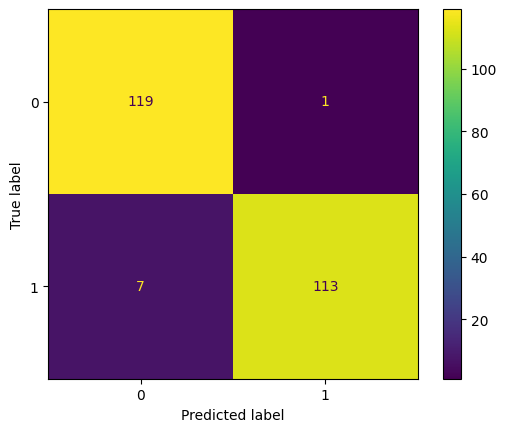

In [75]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(data.drop('is_spam', axis =1 ), 
                                                    data['is_spam'], 
                                                    stratify=data['is_spam'], 
                                                    shuffle=True)
clf = MultinomialNB().fit(X_train, y_train)
plot_cm(y_test, clf.predict(X_test))

## Bernoulli Naive Bayes
M√¥ h√¨nh n√†y ƒë∆∞·ª£c √°p d·ª•ng cho c√°c lo·∫°i d·ªØ li·ªáu m√† m·ªói th√†nh ph·∫ßn l√† m·ªôt gi√° tr·ªã binary - b·∫≥ng 0 ho·∫∑c 1. V√≠ d·ª•: c≈©ng v·ªõi lo·∫°i vƒÉn b·∫£n nh∆∞ng thay v√¨ ƒë·∫øm t·ªïng s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa 1 t·ª´ trong vƒÉn b·∫£n, ta ch·ªâ c·∫ßn quan t√¢m t·ª´ ƒë√≥ c√≥ xu·∫•t hi·ªán hay kh√¥ng.
Ta t√≠nh:
$$p(x_{i}|c)=p(i|c)^{x_{i}}(1-p(i|c)^{1-x_{i}}$$
Trong ƒë√≥ $p(i|c)$ c√≥ th·ªÉ ƒë∆∞·ª£c hi·ªÉu l√† x√°c su·∫•t t·ª´ th·ª© `i` xu·∫•t hi·ªán trong c√°c vƒÉn b·∫£n c·ªßa class `c`.

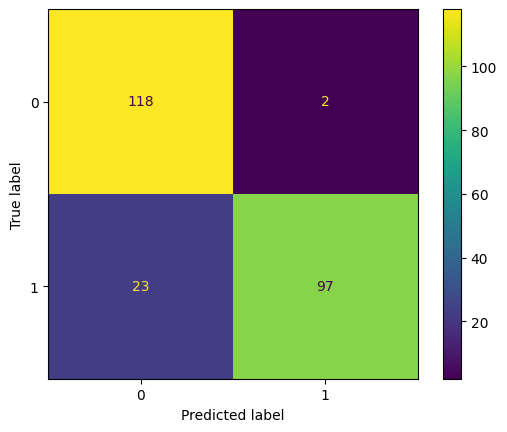

In [49]:
from sklearn.naive_bayes import BernoulliNB
X_train, X_test, y_train, y_test = train_test_split((data.drop('is_spam', axis =1 )>0).astype(int), 
                                                    (data['is_spam']>0).astype(int), 
                                                    stratify=data['is_spam'], 
                                                    shuffle=True)
clf = BernoulliNB().fit(X_train, y_train)
plot_cm(y_test, clf.predict(X_test))

## Categorical Naive Bayes
Ph√π h·ª£p v·ªõi b√†i to√°n classification cho data category features

In [ ]:
from sklearn.naive_bayes import CategoricalNB
X_train, X_test, y_train, y_test = train_test_split(data.drop('is_spam', axis =1 ), 
                                                    data['is_spam'], 
                                                    stratify=data['is_spam'], 
                                                    shuffle=True)
clf = CategoricalNB().fit(X_train, y_train)
plot_cm(y_test, clf.predict(X_test))

# Discriminant Analysis

## Linear Discriminant Analysis (LDA)
- LDA l√† thu·∫≠t to√°n ƒëi t√¨m m·ªôt ph√©p chi·∫øu sao cho t·ªâ l·ªá gi·ªØa `between-class variance` v√† `within-class variance` l·ªõn nh·∫•t c√≥ th·ªÉ:
    - __Within-class variances (SSwithin)__: Ph∆∞∆°ng sai s2 c·ªßa t·ª´ng class khi chi·∫øu l√™n 1 chi·ªÅu nh·∫•t ƒë·ªãnh, th·ªÉ hi·ªán m·ª©c ƒë·ªô ph√¢n t√°n d·ªØ li·ªáu c·ªßa class khi chi·∫øu l√™n chi·ªÅu ƒë√≥. K·ª≥ v·ªçng c√†ng th·∫•p c√†ng t·ªët.
    - __Between-class variance (SSbetween)__: Kho·∫£ng c√°ch gi·ªØa 2 k·ª≥ v·ªçng c·ªßa 2 class, th·ªÉ hi·ªán m·ª©c ƒë·ªô c√°ch xa nhau c·ªßa 2 class: (mean_class1 - mean_class2)^2
- Hai classes ƒë∆∞·ª£c g·ªçi l√† discriminative n·∫øu hai class ƒë√≥ c√°ch xa nhau (`between-class variance` l·ªõn) v√† d·ªØ li·ªáu trong m·ªói class c√≥ xu h∆∞·ªõng gi·ªëng nhau (`within-class variance` nh·ªè). 
    - S·ªë chi·ªÅu kh√¥ng gian m·ªõi sau khi gi·∫£m chi·ªÅu b·∫±ng LDA th√¨ ko  v∆∞·ª£t qu√° C-1, v·ªõi C l√† s·ªë l∆∞·ª£ng class c·ªßa label
    - LDA c√≥ gi·∫£ s·ª≠ ng·∫ßm r·∫±ng d·ªØ li·ªáu c·ªßa c√°c classes ƒë·ªÅu tu√¢n theo ph√¢n ph·ªëi chu·∫©n v√† c√°c ma tr·∫≠n hi·ªáp ph∆∞∆°ng sai c·ªßa c√°c classes l√† g·∫ßn nhau
    - LDA ho·∫°t ƒë·ªông r·∫•t t·ªët n·∫øu c√°c classes l√† linearly separable, tuy nhi√™n, ch·∫•t l∆∞·ª£ng m√¥ h√¨nh gi·∫£m ƒëi r√µ r·ªát n·∫øu c√°c classes l√† kh√¥ng linearly separable. ƒêi·ªÅu n√†y d·ªÖ hi·ªÉu v√¨ khi ƒë√≥, chi·∫øu d·ªØ li·ªáu l√™n ph∆∞∆°ng n√†o th√¨ c≈©ng b·ªã ch·ªìng l·∫ßn, v√† vi·ªác t√°ch bi·ªát kh√¥ng th·ªÉ th·ª±c hi·ªán ƒë∆∞·ª£c nh∆∞ ·ªü kh√¥ng gian ban ƒë·∫ßu.
- LDA L√† ph∆∞∆°ng ph√°p ph√¢n lo·∫°i/ho·∫∑c gi·∫£m chi·ªÅu d·ªØ li·ªáu cho b√†i to√°n classification, ho·∫∑c __b·ªï sung th√¥ng tin__ v·ªÅ label d·ªØ li·ªáu, √°p d·ª•ng cho c·∫£ vi·ªác gi·∫£m chi·ªÅu c≈©ng nh∆∞ b√†i to√°n ph√¢n lo·∫°i. 
- Kh√°c v·ªõi PCA l√† gi·∫£m chi·ªÅu nh∆∞ng gi·ªØ l·∫°i m·ª©c ƒë·ªô variance c·ªßa d·ªØ li·ªáu l·ªõn nh·∫•t v√† ko c·∫ßn th√¥ng tin v·ªÅ label c·ªßa class (kh√¥ng ph·∫£i vi·ªác gi·ªØ l·∫°i th√¥ng tin nhi·ªÅu nh·∫•t s·∫Ω lu√¥n mang l·∫°i k·∫øt qu·∫£ t·ªët nh·∫•t khi ph√¢n lo·∫°i)

In [78]:
X_train.shape

(375, 20)

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

X_cl, y_cl = make_classification(n_samples=500, n_features=20, n_informative=10, n_redundant=5, n_classes=2,)

X_train, X_test, y_train, y_test = train_test_split(X_cl, y_cl)

clf_lda = LinearDiscriminantAnalysis(n_components=1, solver='svd').fit(X_train, y_train)

# score
print(accuracy_score(y_test, clf_lda.predict(X_test)))

# reduce the dimensionality
X_lda = clf_lda.transform(X_test)
print(X_lda.shape)

0.864
(125, 1)


In [82]:
X_lda[:3]

array([[-0.69525204],
       [-0.22320779],
       [-0.30563419]])

## Quadratic Discriminant Analysis.
- T∆∞∆°ng t·ª± LDA nh∆∞ng thay v√¨ linear th√¨ l√† b·∫≠c 2 (quadratic), fitting class b·∫±ng quy t·∫Øc Bayes. M·ªói class ƒë∆∞·ª£c fit theo ph√¢n ph·ªëi chu·∫©n Normal. 

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysi

# Stochastic Gradient Descent
[Chi ti·∫øt](https://scikit-learn.org/stable/modules/sgd.html#sgd)

Linear fitting model (SVM, logistic regression, linear regression, etc.) (config by `loss` parameter) with SGD training: t·ªëi thi·ªÉu gradient (ƒë·ªô d·ªëc) h√†m loss li√™n t·ª•c qua m·ªói batch li√™n t·ª•c (m·∫∑c ƒë·ªãnh SGD __batchsize__ = Online SGD batchsize = 1, Mini-batch SGD batchsize > 1 but < n_samples)

- S·ª≠ d·ª•ng h√†m loss v√† fit l·∫ßn l∆∞·ª£t d·ªØ li·ªáu ƒë·ªÉ t·ªëi thi·ªÉu ho√° h√†m convex loss th√¥ng qua gradient descent (ƒë·∫°o h√†m)
- SGD fit minibatch v·ªõi method `partial_fit` (ch·ªâ c√≥ ·ªü 1 s·ªë algorithms) cho ph√©p h·ªçc online ho·∫∑c out-of-core learning (h·ªçc tƒÉng c∆∞·ªùng/c·∫£i thi·ªán h∆°n so v·ªõi model tr∆∞·ªõc ƒë√≥)
- N√™n s·ª≠ d·ª•ng `StandardScaler` engineering tr∆∞·ªõc khi fit
- Ph√π h·ª£p v·ªõi d·ªØ xli·ªáu l·ªõn > 10000 obs

**Stopping criterion**
- With `early_stopping`=`True`: input data ƒë∆∞·ª£c chia th√†nh train + validation. Model  s·∫Ω fit train set v√† ti√™u ch√≠ d·ª´ng l·∫°i d·ª±a v√†o prediction score c·ªßa validation set. size c·ªßa validation set theo param `validation_fraction`
- With `early_stopping`=`False`: model s·∫Ω fit to√†n b·ªô input data v√† ƒëi·ªÅu ki·ªán d·ª´ng ph·ª• thu·ªôc v√†o objective funciton ƒë∆∞·ª£c t√≠nh to√°n tr√™n t·∫≠p train

Trong c·∫£ hai TH c·ªßa `early_stopping`, h√†m loss ƒë·ªÅu ƒë∆∞·ª£c t√≠nh to√°n l·∫°i sau m·ªói 1 epoch, ƒëi·ªÅu ki·ªán d·ª´ng l√† khi 1 trong 2 TH:
- h√†m loss m·ªõi c√≥ xu h∆∞·ªõng tƒÉng l√™n so v·ªõi best loss (the min loss) 1 gi√° tr·ªã l·ªõn h∆°n `tol` trong v√≤ng `n_iter_no_change` epoch li√™n ti·∫øp (t·ª©c l√† loss > best_loss + `tol`)
- s·ªë epoch ch·∫°m ng∆∞·ª°ng `max_iter`

**Pros:**
- Hi·ªáu qu·∫£ n·∫øu tunning ch√≠nh x√°c v√† t·ªâ m·∫©n
- D·ªÖ d·ªÉ th·ª±c hi·ªán v√† √°p d·ª•ng th·ª±c t·∫ø do c√≥ c∆° ch·∫ø `partial_fit`

**Cons:**
- SGD y√™u c·∫ßu tunning nhi·ªÅu parameters.
- SGD nh·∫°y c·∫£m v·ªõi feature scale (need to `StandardScaler`).
- Do vi·ªác h·ªçc t·ª´ng ph·∫ßn c√≥ th√™m ph·∫ßn chi ph√≠ l∆∞u tr·ªØ n√™n ch·ªâ s·ª≠ d·ª•ng khi d·ªØ li·ªáu th·ª±c s·ª± l·ªõn v√† chia theo chunks

## SGD Regression

**`loss` parameter**
- loss="`squared_error`": Ordinary least squares,
- loss="`huber`": Huber loss for robust regression,
- loss="`epsilon_insensitive`": linear Support Vector Regression. (linearSVM)

In [72]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(loss="squared_error")
reg.fit(X_train, y_train)


# R-squared score
reg.score(X_test, y_test)

0.9494588558075366

In [73]:
# partial_fit
reg.partial_fit(X_test, y_test)

# R-squared score
reg.score(X_test, y_test)

0.950614663855244

## SGD Classification

**`loss` parameter**
- ‚Äò`hinge`‚Äô gives a linear SVM.
- ‚Äò`log_loss`‚Äô gives logistic regression, a probabilistic classifier.
- ‚Äò`modified_huber`‚Äô is another smooth loss that brings tolerance to outliers as well as probability estimates.
- ‚Äò`squared_hinge`‚Äô is like hinge but is quadratically penalized.
- ‚Äò`perceptron`‚Äô is the linear loss used by the perceptron algorithm.
- The other losses, ‚Äò`squared_error`‚Äô, ‚Äò`huber`‚Äô, ‚Äò`epsilon_insensitive`‚Äô and ‚Äò`squared_epsilon_insensitive`‚Äô are designed for regression but can be useful in classification as well; see `SGDRegressor` for a description.

**`learning_rate`**
- ‚Äòconstant‚Äô: eta = eta0
- ‚Äòoptimal‚Äô: eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.
- ‚Äòinvscaling‚Äô: eta = eta0 / pow(t, power_t)
- ‚Äòadaptive‚Äô: eta = eta0, mi·ªÖn l√† loss ti·∫øp t·ª•c theo chi·ªÅu h∆∞·ªõng gi·∫£m. N·∫øu trong v√≤ng `n_iter_no_change` epoch m√† loss tƒÉng v∆∞·ª£t qu√° `tol` ho·∫∑c validation score b·ªã gi·∫£m qu√° `tol`( trong TH set `early_stopping`=`True`) th√¨ eta = eta/5

In [99]:
X_cl, y_cl = make_classification(n_samples=2000, n_features=20, n_informative=10, n_redundant=5, n_classes=2,flip_y = 0.1)

X_train, X_test, y_train, y_test = train_test_split(X_cl, y_cl)

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

sgd = SGDClassifier(loss='hinge', # type of loss function
                    penalty='l2', # type of penalty to coef, L1 d·∫´n t·ªõi ph·∫ßn l·ªõn c√°c coef = 0, elasticnet c√¢n b·∫±ng l1 + l2
                    alpha=0.0001, # h·ªá s·ªë nh√¢n v·ªõi penalty, c√†ng cao th√¨ regularization c√†ng l·ªõn
                    l1_ratio=0.15, # h·ªá s·ªë c√¢n b·∫±ng l1 v·ªõi l2 khi s·ª≠ d·ª•ng elasticnet regularization
                    fit_intercept=True, # c√≥ estimate intercept hay kh√¥ng ?
                    max_iter=1000, # s·ªë each t·ªëi ƒëa cho fitting (ch·ªâ √°p d·ª•ng cho fit, ko √°p d·ª•ng cho partial_fit)
                    tol=0.001, # ch√™ch l·ªách t·ªëi ƒëa cho ph√©p gi·ªØa loss hi·ªán t·∫°i v√† best_loss (the min loss), n·∫øu v∆∞·ª£t th√¨ s·∫Ω d·ª´ng l·∫°i fitting
                    shuffle=True, # data c√≥ ƒë∆∞·ª£c shuffle sau m·ªói 1 each ƒë∆∞·ª£c train
                    verbose=0, 
                    epsilon=0.1, # ch·ªâ ·∫£nh h∆∞·ªüng t·ªõi h√†m loss c·ªßa ‚Äòhuber‚Äô, ‚Äòepsilon_insensitive‚Äô, or ‚Äòsquared_epsilon_insensitive‚Äô.
                                    # ƒë·ªëi v·ªõi 'huber' l√† ng∆∞·ª°ng m√† t·∫°i ƒë√≥ nh·ªØng d·ª± ƒëo√°n ch√≠nh x√°c tr·ªü n√™n √≠t quan t√¢m, ch·ªâ care nh·ªØng d·ª• ƒëo√°n sai g√¢y ra nhi·ªÅu loss
                                    # ƒë·ªëi v·ªõi ‚Äòepsilon_insensitive‚Äô l√† ng∆∞·ª°ng m√† khi s·ª± kh√°c bi·ªát gi≈©a prediction v√† real m√† nh·ªè h∆°n ng∆∞·ª°ng n√†y th√¨ b·ªè qua
                    n_jobs=None, 
                    random_state=None, # n·∫øu kh√¥ng c·ªë ƒë·ªãnh, SGD performance b·ªã ·∫£nh h∆∞·ªüng r·∫•t nhi·ªÅu b·ªüi ƒëi·ªÉm kh·ªüi ƒë·∫ßu
                    learning_rate='optimal', # xem t·∫°i note learning_rate
                    eta0=0.0, # learning_rate ban ƒë·∫ßu
                    power_t=0.5, # h·ªá s·ªë ch·ªânh khi set learning_rate = 'invscaling'
                    early_stopping=False,  # c√≥ split ra validation set v√† x√©t early stopping tr√™n ƒë√≥ hay kh√¥ng ?(stop khi validation score is not improved)
                    validation_fraction=0.1, # t·ª∑ l·ªá ph√¢n chia cho validation set
                    n_iter_no_change=5, # s·ªë l∆∞·ª£ng epoch cho ph√©p loss/validation score kh√¥ng ƒë∆∞·ª£c c·∫£i thi·ªán
                    class_weight=None, # ƒë√°nh tr·ªçng s·ªë cho t∆∞·ªùng class, d√πng trong TH imbalance data
                    warm_start=False, # n·∫øu True, s·ª≠ d·ª•ng c√°c tham s·ªë ƒë√£ c√≥ c·ªßa l·∫ßn call fit tr∆∞·ªõc ƒë√≥ l√†m c√°c gi√° tr·ªã ban ƒë·∫ßu, n·∫øu ko th√¨ x√©t l·∫°i t·ª´ ƒë·∫ßu
                    average=False # coef ƒë∆∞·ª£c t√≠nh average weight cho c√°c l·∫ßn c·∫≠p nh·∫≠t hay ko, n·∫øu True l√† all, n·∫øu = 10 th√¨ l·∫•y average coef_ c·ªßa 10 l·∫ßn update g·∫ßn nh·∫•t
                   )

clf = make_pipeline(StandardScaler(),sgd)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.684

# Support Vector Machines (SVM)
SVM used for __classification__, __regression__ and __outliers detection__.

__Pros:__
- Hi·ªáu qu·∫£ v·ªõi d·ªØ li·ªáu nhi·ªÅu chi·ªÅu
- Hi·ªáu qu·∫£ v·ªõi d·ªØ li·ªáu c√≥ n_features > n_sample
- Ch·ªâ c·∫ßn 1 subset ƒë·ªÉ training--> hi·ªáu qu·∫£ v·ªÅ m·∫∑t l∆∞u tr·ªØ ram
- S·ª≠ d·ª•ng k·∫øt h·ª£p v·ªõi __Kernel__ function ƒë·ªÉ tu·ª≥ ch·ªânh c√°ch fitting

__Cons:__
- N·∫øu n_feature >> n_sample, c·∫ßn ph·∫£i tunning th·∫≠t k·ªπ kernel v√† regularization term ƒë·ªÉ tr√°nh overfitting
- SVMs kh√¥ng cung c·∫•p tr·ª±c ti·∫øp probability estimates prediction, m√† c·∫ßn t√≠nh to√°n qua 5-fold CV.

## SVM Classification (SVC)
S·ª≠ d·ª•ng cho binary ho·∫∑c multi-class classification, t√¨m 1 hyper-plane  ho·∫∑c 1 set hyper-planes trong kh√¥ng gian ƒëa chi·ªÅu, m√† t·∫°i ƒë√≥ kho·∫£ng c√°ch t·ª´ hyper-plane t·ªõi ƒëi·ªÉm g·∫ßn nh·∫•t c·ªßa m·ªói class l√† l·ªõn nh·∫•t
- `SVC` v√† `NuSVC` kh√° gi·ªëng nhau, ch·ªâ kh√°c ·ªü b·ªô tham s·ªë v√† h√†m t√≠nh to√°n
- `LinearSVC` ch·∫°y nhanh do th·ª±c hi·ªán linear kernel, do ƒë√≥ kh√¥ng th·ªÉ ch·ªânh `kernel` parameter trong `LinearSVC`

**Multi-class classification**
- `SVC` v√† `NuSVC` th·ª±c hi·ªán ‚Äúone-versus-one‚Äù approach cho multi-class classification, c√≥ t·ªïng c·ªông l√† `n_classes` * (`n_classes` - 1) / 2 sub-model
- `LinearSVC` th·ª±c hi·ªán "one-vs-the-rest", cho n√™n training ch·ªâ c√≥ `n_classes` sub-model (preferer to use)

**Unbalanced problems**
- S·ª≠ d·ª•ng `class_weight` (ch·ªâ c√≥ trong SVC, not NuSVC) ho·∫∑c `sample_weight` parameters ƒë·ªÉ thay ƒë·ªïi weight cho c√°c minority class 

### SVC
- Th·ª±c hi·ªán d·ª±a tr√™n pph∆∞∆°ng ph√°p 'libsvm'
- Ph√π h·ª£p v·ªõi d·ªØ li·ªáu v·ª´a v√† nh·ªè (For large datasets consider using LinearSVC or SGDClassifier instead)
- H·ªó tr·ª£ s·ª≠ d·ª•ng kernel function, tunning qua tham s·ªë:
    - gamma
    - coef0
    - degree
- V·ªõi multi-class, s·ª≠ d·ª•ng pp ti·∫øp c·∫≠n one-vs-one

In [114]:
from sklearn.svm import SVC

svc = SVC(
    C=1.0, # m·ª©c ƒë·ªô penalty, C c√†ng l·ªõn th√¨ ph·∫°t c√†ng √≠t (ng∆∞·ª£c v·ªõi alpha c·ªßa L2, L1)
    kernel='rbf', # h√†m kernel ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ transform data {‚Äòlinear‚Äô, ‚Äòpoly‚Äô, ‚Äòrbf‚Äô, ‚Äòsigmoid‚Äô, ‚Äòprecomputed‚Äô}
    degree=3, # b·∫≠c c·ªßa 'poly' kernel
    gamma='scale', # h·ªá s·ªë c·ªßa h√†m kernel ‚Äòrbf‚Äô, ‚Äòpoly‚Äô and ‚Äòsigmoid‚Äô.
    coef0=0.0, # h·ªá s·ªë independent term c·ªßa h√†m kernel ‚Äòpoly‚Äô and ‚Äòsigmoid‚Äô.
    shrinking=True, 
    probability=False, # c√≥ ∆∞·ªõc l∆∞·ª£ng x√°c su·∫•t c·ªßa prediction hay ko ?
    tol=0.001, # ng∆∞·ª°ng c·ªßa ƒëi·ªÅu ki·ªán d·ª´ng
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)

svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.898

### LinearSVC
- Th·ª±c hi·ªán t∆∞∆°ng t·ª± nh∆∞ SVC kernel = 'linear' v√† d·ª±a tr√™n ph∆∞∆°ng ph√°p 'liblinear'
- Ph√π h·ª£p v·ªõi d·ªØ li·ªáu l·ªõn
- H·ªó tr·ª£ s·ª≠ d·ª•ng regularization {L1, L2}
- V·ªõi multi-class, pp ti·∫øp c·∫≠n l√† one-vs-rest

In [115]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(
    penalty='l2',
    loss='squared_hinge',
    dual=True,
    tol=0.0001,
    C=1.0,
    multi_class='ovr',
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    verbose=0,
    random_state=None,
    max_iter=1000,
)

lsvc.fit(X_train, y_train)
lsvc.score(X_test, y_test)

/Users/khongdat/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.74

## SVM Regression (SVR)
t∆∞∆°ng t·ª± SVC

In [116]:
# SVR
from sklearn.svm import SVR

# linearSVR
from sklearn.svm import LinearSVR

## OneClassSVM Outlier Detection
- Unsupervised Outlier Detection, using 'libsvm'

In [119]:
from sklearn.svm import OneClassSVM

one = OneClassSVM(
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    nu=0.5,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

one.fit(X_train)


OneClassSVM()

## Kernel Function

[Chi ti·∫øt 1.4.6. Kernel functions](https://scikit-learn.org/stable/modules/svm.html#kernel-functions)

**idea:** S·ª≠ d·ª•ng 1 h√†m phi tuy·∫øn t√≠nh (g·ªçi l√† `kernel`) ƒë·ªÉ bi·∫øn ƒë·ªïi data ban ƒë·∫ßu kh√¥ng ph√¢n bi·ªát ƒë∆∞·ª£c linear th√†nh data v·ªõi chi·ªÅu kh√¥ng gian m·ªõi v√† s·ª≠ d·ª•ng linear-line ho·∫∑c 1 m·∫∑t ph·∫≥ng ƒë·ªÉ ph√¢n t√°ch data (ƒë√£ bi·∫øn ƒë·ªïi) v√† v·∫´n tr√™n margin l·ªõn nh·∫•t
![image.png](_images/4_ML_Algorithms/classification/kernel_f.png)
```python
kernel = 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed',...
```
![image.png](_images/4_ML_Algorithms/classification/kernel_t.png)

**∆∞u ƒëi·ªÉm**
- th·ª±c hi·ªán t·ªët tr√™n nhi·ªÅu lo·∫°i datasets
- Linh ƒë·ªông b·ªüi c√≥ th·ªÉ th·ª±c hi·ªán b·∫±ng nhi·ªÅu h√†m kernel kh√°c nhau
- Th·ª±c hi·ªán t·ªët tr√™n c·∫£ data nhi·ªÅu chi·ªÅu hay √≠t chi·ªÅu

**nh∆∞·ª£c ƒëi·ªÉm**
- Th·ªùi gian ch·∫°y l√¢u v√† t·ªën nhi·ªÅu dung l∆∞·ª£ng khi ch·∫°y sample size l·ªõn (l·ªõn h∆°n 50000 samples)
- C·∫ßn c·∫ßn th·∫≠n trong vi·ªác normalize data
- Kh√¥ng cung c·∫•p x√°c su·∫•t ∆∞·ªõc l∆∞·ª£ng c·ªßa ph√¢n ph·ªëi (tuy nhi√™n c√≥ th·ªÉ t√≠nh ƒë∆∞·ª£c b·∫±ng `Platt scaling`)
- Kh√≥ th·ªÉ gi·∫£i th√≠ch vi·ªác d·ª± ƒëo√°n c·ªßa model, di·ªÖn gi·∫£i

**RBF kernel**

- H√†m `RBF kernel` s·∫Ω s·ª≠ d·ª•ng kho·∫£ng c√°ch gi·ªØa c√°c obs ƒë·ªÉ ph√¢n t√°ch, d·ª±a tr√™n tham s·ªë `gammar`
- `Gammar` th·ªÉ hi·ªán ƒë·ªô nh·ªçn c·ªßa ph√¢n ph·ªëi c·ªßa class "y<>1", khi `gammar` c√†ng l·ªõn th√¨ c√†ng √≠t v√πng xung quanh obs y<>1 ƒë∆∞·ª£c d·ª± b√°o l√† y<>1 (hay x√°c su·∫•t c·ªßa ph√¢n ph·ªëi y<>1 s·∫Ω nh·ªçn h∆°n, c√°c ƒëi·ªÉm ·ªü xa obs y<>1 s·∫Ω c√≥ x√°c su·∫•t ƒë·ªÉ y<>1 √≠t h∆°n)
- `Gammar` tƒÉng th√¨ model c√†ng b·ªã over-fitting

**Poly kernel**

- H√†m `poly kernel` s·∫Ω s·ª≠ d·ª•ng h√†m b·∫≠c `degree` ƒë·ªÉ bi·∫øn ƒë·ªïi data v√† ph√¢n t√°ch d·ª±a tr√™n data ƒë√£ bi·∫øn ƒë·ªïi
- `degree` c√†ng l·ªõn th√¨ model c√†ng complex, d·ªÖ b·ªã over-fitting

# Nearest neighbors 
Thu·∫≠t to√°n √°p d·ª•ng cho supervised and unsupervised. Trong supervised, NN √°p d·ª•ng trong c·∫£ Classification (class ch√≠nh) ho·∫∑c Regression (average target value) tr√™n c√°c ƒëi·ªÉm t∆∞∆°ng ƒë·ªìng ho·∫∑c g·∫ßn gi·ªëng nhau

- feature ph·∫£i ƒë∆∞·ª£c convert sang d·∫°ng numeric v√† chu·∫©n ho√° scaling, multicollinearity kh√¥ng ·∫£nh h∆∞·ªüng g√¨ ƒë·∫øn thu·∫≠t to√°n.
- ƒêo s·ª± t∆∞∆°ng ƒë·ªìng/kho·∫£ng c√°ch: euclidean (popular), manhattan,...
- Gi√° tr·ªã k ph√π h·ª£p: gridsearch ƒë·ªÅ t√¨m k ph√π h·ª£p
    - N·ªÅu k low: overfitting
    - N·∫øu k high: gi·∫£m t√°c ƒë·ªông c·ªßa c√°c neighbours g·∫ßn nh·∫•t

S·ª≠ d·ª•ng KNN ƒë·ªÉ h·ªó tr·ª£ c√°c lo·∫°i pp ph√¢n l·ªõp kh√°c, k·∫øt qu·∫£ c·ªßa KNN ƒë∆∞·ª£c s·ª≠ d·ª•ng nh∆∞ 1 feature m·ªõi t·∫°o ra, ho·∫∑c s·ª≠ d·ª•ng ensemble v·ªõi pp kh√°c

## Finding NN (unsupervised)

In [123]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(    
    n_neighbors=5,  # s·ªë l∆∞·ª£ng neighbors g·∫ßn nh·∫•t mu·ªën s·ª≠ d·ª•ng ƒë·ªÉ ƒë√°nh gi√°
    radius=1.0,     # b√°n k√≠nh cho vi·ªác t√¨m ki·∫øm neighbours
    algorithm='auto', # thu·∫≠t to√°n x√°c ƒë·ªãnh nearest neighbours {‚Äòauto‚Äô, ‚Äòball_tree‚Äô, ‚Äòkd_tree‚Äô, ‚Äòbrute‚Äô}, default=‚Äôauto‚Äô
    leaf_size=30, # k√≠ch th∆∞·ªõc leaf trong thu·∫≠t to√°n ‚Äòball_tree‚Äô, ‚Äòkd_tree‚Äô
    metric='minkowski', # metrics ƒëo kho·∫£ng c√°ch
    p=2, # v·ªõi metric='minkowski' th√¨ p=1 l√† kho·∫£ng c√°ch L1, p=2 l√† kho·∫£ng c√°ch L2 (euclidean)
    metric_params=None, #  Additional keyword arguments for the metric function
    n_jobs=None,
)

nbrs.fit(X_train)
distances, indices = nbrs.kneighbors(X_train)
indices[:3] # 5 NN index c·ªßa 3 obs ƒë·∫ßu ti√™n

array([[   0,  696,  729,  445, 1112],
       [   1, 1378,  450, 1316,  892],
       [   2, 1154,  655,  988, 1381]])

## KNN classification
T√¨m majority class trong s·ªë k-nn c·ªßa new record

In [1]:
from sklearn.neighbors import KNeighborsClassifier

knnc = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform', # set t·ª∑ tr·ªçng cho c√°c neighbours {‚Äòuniform‚Äô, ‚Äòdistance‚Äô}
    algorithm='auto', # thu·∫≠t to√°n x√°c ƒë·ªãnh nearest neighbours {‚Äòauto‚Äô, ‚Äòball_tree‚Äô, ‚Äòkd_tree‚Äô, ‚Äòbrute‚Äô}, default=‚Äôauto‚Äô
    leaf_size=30, # k√≠ch th∆∞·ªõc leaf trong thu·∫≠t to√°n ‚Äòball_tree‚Äô, ‚Äòkd_tree‚Äô
    p=2, # v·ªõi metric='minkowski' th√¨ p=1 l√† kho·∫£ng c√°ch L1, p=2 l√† kho·∫£ng c√°ch L2 (euclidean)
    metric='minkowski', # metrics ƒëo kho·∫£ng c√°ch
    metric_params=None,  #  Additional keyword arguments for the metric function
    n_jobs=None,
)

## KNN classification
T√¨m gi√° tr·ªã trung b√¨nh Y trong s·ªë k-nn c·ªßa new record

In [1]:
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(
    n_neighbors=5,
    weights='uniform', # set t·ª∑ tr·ªçng cho c√°c neighbours {‚Äòuniform‚Äô, ‚Äòdistance‚Äô}
    algorithm='auto', # thu·∫≠t to√°n x√°c ƒë·ªãnh nearest neighbours {‚Äòauto‚Äô, ‚Äòball_tree‚Äô, ‚Äòkd_tree‚Äô, ‚Äòbrute‚Äô}, default=‚Äôauto‚Äô
    leaf_size=30, # k√≠ch th∆∞·ªõc leaf trong thu·∫≠t to√°n ‚Äòball_tree‚Äô, ‚Äòkd_tree‚Äô
    p=2, # v·ªõi metric='minkowski' th√¨ p=1 l√† kho·∫£ng c√°ch L1, p=2 l√† kho·∫£ng c√°ch L2 (euclidean)
    metric='minkowski', # metrics ƒëo kho·∫£ng c√°ch
    metric_params=None,  #  Additional keyword arguments for the metric function
    n_jobs=None,
)

# Tree-base model

L√† thu·∫≠t to√°n non-parametric supervised learning cho c√† classification v√† regression th√¥ng qua b·ªô rule if-else

__Pros__

- Simple to understand and interpret, visualized
- Kh√¥ng c·∫ßn th·ª±c hi·ªán nhi·ªÅu quy tr√¨nh preprocessing: ko c·∫ßn normalize, scaling hay categorical encoding. Tuy nhi√™n v·∫´n c·∫ßn missing imputation, v√† n√™n CEncoding trong sklearn.
- Support multi-output
- White-box algorithms, n√™n d·ªÖ gi·∫£i th√≠ch
- C√≥ kh·∫£ nƒÉng gi·∫£i th√≠ch model b·∫±ng statistic test

__Cons__:

- D·ªÖ overfitting n·∫øu kh√¥ng tunning t·ªët, d·∫´n t·ªõi higher variance in the model
- Ph·∫£i k·∫øt h·ª£p trong vi·ªác s·ª≠ d·ª•ng ensemble ƒë·ªÉ tƒÉng t√≠nh hi·ªáu qu·∫£
- data tr∆∞·ªõc khi fit c·∫ßn ph·∫£i ƒë∆∞·ª£c x·ª≠ l√Ω imbalance

__1. Terms__
- __Leaf__: End of branches of a tree
- __Loss__: t·ªïng s·ªë records b·ªã missclassification trong node ƒë√≥. V√≠ d·ª•, trong 1 node ph√¢n lo·∫°i b·∫±ng A>=m l√† class 1, else th√¨ ti·∫øp t·ª•c ph√¢n lo·∫°i th√¨ ·ª©ng v·ªõi ƒëi·ªÅu ki·ªán A>=m  tr√™n c√≥ 100 records, nh∆∞ng th·ª±c t·∫ø trong 100 records ƒë√≥ ch·ªâ c√≥ 80 records l√† class 1, c√≤n l·∫°i 20 records l√† class 0, th√¨ loss l√† 20. 
- __Impurity__: M·ª©c ƒë·ªô h·ªón t·∫°p c·ªßa 1 partition (ng∆∞·ª£c l·∫°i l√† ƒë·ªô tinh khi·∫øt - homogeneity) s·ª≠ d·ª•ng ƒë·ªÉ l·ª±a ch·ªçn split value ph√π h·ª£p

    
__2. ƒêo l∆∞·ªùng ƒë·ªô Impurity/ ho·∫∑c Homogeneity__

__2.1. Gini impurity Index__: Gini index ch·ªâ ra m·ª©c ƒë·ªô phan lo·∫°i kh√¥ng ch√≠nh x√°c khi l·ª±a ch·ªçn ng·∫´u nhi√™n 1 feature ƒë·ªÉ ph√¢n lo·∫°i `Y` c√≥ ƒë∆∞·ª£c gi·∫£m h∆°n hay kh√¥ng ?

$$GiniIndex_Y = Gini_Y - \sum_{X_i‚ààk}[P(x‚ààX_i)*Gini(X_i)]$$

- Kh√°c bi·ªát v·ªõi Information gain ·ªü ch·ªó thay entropy b·∫±ng `Gini Y` = `1 - sum( P(x‚ààXi)^2 )` v·ªõi `P(x‚ààXi)` l√† x√°c su·∫•t ph·∫ßn t·ª≠ thu·ªôc nh√≥m con `Xi` c·ªßa `X`, Ta l·ª±a ch·ªçn feature sao cho gini c√°c node con nh·ªè, t∆∞∆°ng ƒë∆∞∆°ng v·ªõi Gini Index l√† l·ªõn nh·∫•t
- GiniIndex ph√π h·ª£p v·ªõi d·ªØ li·ªáu l·ªõn, c·∫ßn t·ªëi ∆∞u v·ªÅ kh·∫£ nƒÉng t√≠nh to√°n nhanh so v·ªõi entropy

GiniIndex use in CART algorithm.

__2.2. Information gain (entropy)__: IG ch·ªâ ra m·ª©c ƒë·ªô th√¥ng tin gain ƒë∆∞·ª£c, hay s·ª± m·∫•t ƒëi c·ªßa t√≠nh impurity trong bi·∫øn outcome `Y` khi s·ª≠ d·ª•ng s·ª± ph√¢n chia nh√≥m trong bi·∫øn `X` n√†o ƒë√≥. L·ª±a ch·ªçn `X` v√† ti√™u ch√≠ ph√¢n nh√≥m `Y` theo `X` ƒë·ªÉ sao cho c√≥ ƒë∆∞·ª£c IG l·ªõn nh·∫•t.

$$I(Y,X) = H(Y) -\sum_{X_i}^{q}[{P(x‚ààX_i)}*H(Y|X_i)]$$
- Trong ƒë√≥:
    - `I(Y|X)` l√† information gain c·ªßa outcome Y khi bi·∫øt ƒëi·ªÅu ki·ªán ph√¢n chia nh√≥m c·ªßa feature `X`
    - `H(Y)` l√† entropy ban ƒë·∫ßu c·ªßa `Y` khi kh√¥ng d√πng ƒëk `X` trong nh√≥m `X`
    - `q` l√† c√°c nh√≥m sau ph√¢n chia `X`
    - `P(x‚ààXi)` l√† x√°c su·∫•t ph·∫ßn t·ª´ `i` thu·ªôc nh√≥m `Xi` sau khi ph√¢n chia, hay b·∫±ng `size(Xi)`/`size(X)`
    - `H(Y|Xi)` l√† entropy c·ªßa Y trong nh√≥m `Xi`
    
IG s·ª≠ d·ª•ng trong thu·∫≠t to√°n ID3, C4.5

___Entropy___: Th·ªÉ hi·ªán m·ª©c ƒë·ªô kh√¥ng ch·∫Øc ch·∫Øn v·ªÅ value c·ªßa 1 bi·∫øn X
- Entropy `H(X)`: M·ª©c ƒë·ªô kh√¥ng ch·∫Øc ch·∫Øn v·ªÅ value c·ªßa `X`
- Joint entropy `H(X,Y)`: m·ª©c ƒë·ªô kh√¥ng ch·∫Øc ch·∫Øn c·ªßa c·∫£ 2 bi·∫øn `X` v√† `Y` c√πng l√∫c
- Condition entropy `H(X|Y)`: Entropy c·ªßa `X` khi bi·∫øt bi·∫øn `Y`
- Cross Entropy `Hp(q)`: cho bi·∫øt s·ª± m·ª©c ƒë·ªô kh√°c bi·ªát gi·ªØa 2 ph√¢n b·ªë x√°c su·∫•t khi d·ªØ li·ªáu ban ƒë·∫ßu ƒë∆∞·ª£c m√¥ t·∫£ theo ph√¢n ph·ªëi `p` nh∆∞ng √°p d·ª•ng v·ªõi ph√¢n ph·ªëi `q`

__2.3. Variance for regression__

__3. Stoping the tree from growing__
- `Max depth`: Chi·ªÅu s√¢u t·ªëi ƒëa c·ªßa leaf, range 5-30
- `Min sample leaf`: S·ªë sample t·ªëi thi·ªÉu c·ªßa 1 leaf, s·∫Ω kh√¥ng t·∫°o ra c√°c leaf c√≥ s·ªë  sample trong leaf √≠t h∆°n
- `Min sample split`: S·ªë sample t·ªëi thi·ªÉu c·∫ßn c√≥ ƒë·ªÉ ti·∫øp t·ª•c th·ª±c hi·ªán split, n·∫øu sample √≠t h∆°n, th·ª±c hi·ªán assign class b·∫±ng probability l·ªõn h∆°n.
- `Pruning`: qu√° tr√¨nh lo·∫°i b·ªè nh·ªØng leaf ·ªü d∆∞·ªõi c·ªßa full-grown tree ƒë·ªÉ gi·∫£m overfitting
    - ___Reduced error pruning___:t·∫°o validation dataset v√† c·∫Øt t·ªâa leaf node n·∫øu t·ªáp validation ƒë∆∞·ª£c c·∫£i thi·ªán
    - ___Loss function___: t·∫°o h√†m loss k√®m theo regularization l√† s·ªë l∆∞·ª£ng leaf node, cut t·ªâa n·∫øu gi·∫£m ƒë∆∞·ª£c l√†m loss
    
__4. Application__
- Cung c·∫•p visual tool v·∫ø c√°c feature quan tr·ªçng, capture non-linear gi·ªØa X v√† Y
- M·ªü r·ªông model b·∫±ng ensemble method:
    - Classification:
    - Regression: v·ªõi regression th√¨ impurity ƒë∆∞·ª£c ƒëo b·∫±ng Squared errors (quared deviations from the mean) v√† perform by RMSE

## Decision Tree

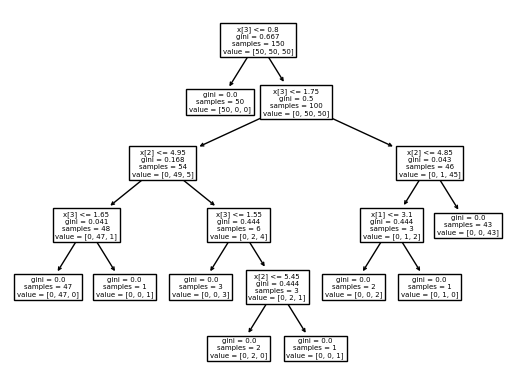

In [13]:
# classification
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_score

dtc = tree.DecisionTreeClassifier(
    criterion='gini', # function ƒëo ch·∫•t l∆∞·ª£ng split
    splitter='best', # chi·∫øn l∆∞·ª£c to choose the split each node 
    max_depth=None, # ƒë·ªô d√†i t·ªëi ƒëa c·ªßa tree
    min_samples_split=2, # S·ªë sample t·ªëi thi·ªÉu c·∫ßn c√≥ ƒë·ªÉ ti·∫øp t·ª•c th·ª±c hi·ªán split, 
                            # n·∫øu sample √≠t h∆°n, th·ª±c hi·ªán assign class b·∫±ng probability l·ªõn h∆°n.
    min_samples_leaf=1, # S·ªë sample t·ªëi thi·ªÉu c·ªßa 1 leaf, s·∫Ω kh√¥ng t·∫°o ra c√°c leaf c√≥ s·ªë sample trong leaf √≠t h∆°n
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0, # Node s·∫Ω split n·∫øu m·ª©c gi·∫£m impurity l·ªõn h∆°n ho·∫∑c b·∫±ng gi√° tr·ªã n√†y
    class_weight=None,
    ccp_alpha=0.0,
)
iris = load_iris()
dtc.fit(iris.data, iris.target)
# plot = tree.plot_tree(dtc,)

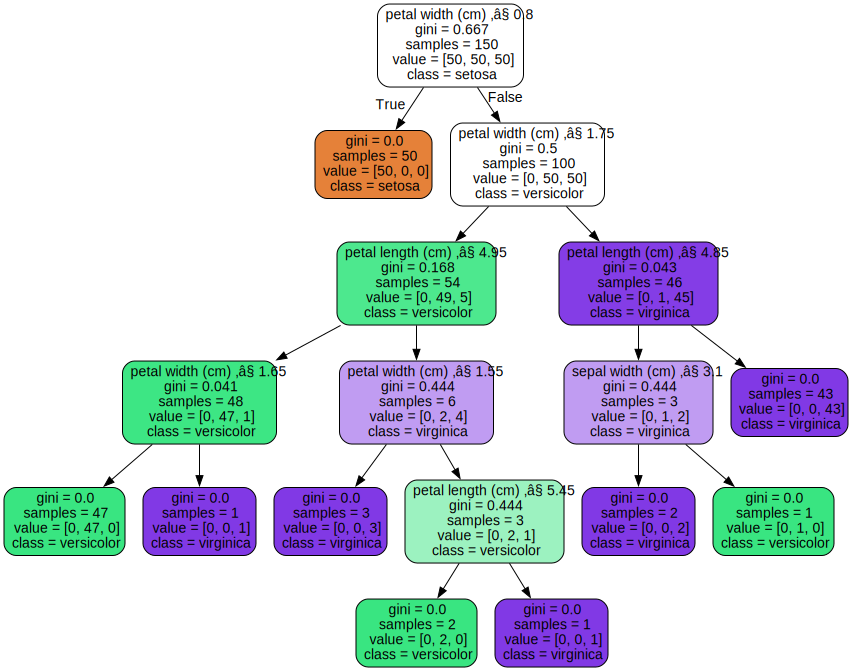

In [17]:
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

# render to pdf
# graph.render("iris") 

# Ensemble learning

## Weighted
S·ª≠ d·ª•ng k·∫øt h·ª£p nhi·ªÅu model v√† k·∫øt h·ª£p l·∫°i th√†nh 1 meta-model:
- V·ªõi regression: Average outcome
- V·ªõi Classification: majority label


## Bagging

X√¢y d·ª±ng c√°c models c√πng l·∫°i nh∆∞ng train tr√™n c√°c subsamples kh√°c nhau t·ª´ raw-sample, c√°c subsample n√†y ƒë∆∞·ª£c sinh ra t·ª´ ph∆∞∆°ng ph√°p __bootstraping with replacement__. 

C√°c model n√†y ƒë·ªôc l·∫≠p v√† song song v·ªõi nhau, k·∫øt qu·∫£ cu·ªëi c√πng s·ª≠ d·ª•ng trung b√¨nh c·ªông c√°c decision rules ho·∫∑c `majority class`

--> M·ª•c ti√™u l√† gi·∫£m __variance__ - √°p d·ª•ng cho c√°c model ƒë√£ c√≥ s·∫µn __bias th·∫•p__ v√† ƒëang b·ªã __variance cao__

### Random Forest
RF ngo√†i vi·ªác t·∫°o __bootstrap with replacement subsample by records__ t·ª´ raw sample th√¨ c√≤n th·ª±c hi·ªán __bootstrap without replacement by variables__

Tuy nhi√™n FR l√† 1 blackbox model, kh√°c v·ªõi simple decision tree.

--> gi√∫p gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ khi input ƒë·∫ßu v√†o thi·∫øu 1 s·ªë features (ch·ª©a nan v√† kh√¥ng mu·ªën imputation)

__1. out of bag score (oob)__
- __OOB sample__ l√† t·∫≠p obs kh√¥ng n·∫±m trong t·∫≠p train (dc bootstrap trong total obs) c·ªßa m·ªói single tree.
- __OOB score__ l√† m·ªôt c√°ch validate RF model, th√¥ng qua t√≠nh t·ª∑ l·ªá obs trong oob sample dc d·ª± ƒëo√°n ƒë√∫ng b·ªüi single tree t∆∞∆°ng ·ª©ng. v√≠ d·ª•: `xi` kh√¥ng thu·ªôc t·∫≠p train c·ªßa c√°c tree `DT1`, `DT2`,... ,`DTn`, s·∫Ω ƒë∆∞·ª£c d·ª± b√°o b·ªüi c√°c tree n√†y, n·∫øu majority voting == real labels ---> xi l√† 1 obs predict ƒë√∫ng. l√†m t∆∞∆°ng t·ª± vs c√°c obs kh√°c v√† t√≠nh t·ª∑ l·ªá predict ƒë√∫ng.
- __OOB error__ = 1 - __OOB score__: th·ªÉ hi·ªán t·ª∑ l·ªá obs oob d·ª± ƒëo√°n sai.

OOB error is a way similar a validation score but in __smaller dataset__(not suitable for split train + val dataset), check the error rate change by number of estimator


![image.png](_images/4_ML_Algorithms/oob.png)

__2. Variable Importance__ (`model.feature_importances_`)

- **decrease in accuracy of the model**: M·ª©c ƒë·ªô gi·∫£m ƒë·ªô ch√≠nh x√°c c·ªßa model th√¥ng qua oob_score n·∫øu bi·∫øn n√†y ƒë∆∞·ª£c ho√°n ƒë·ªïi random value gi·ªØa c√°c records 1 c√°ch ng·∫´u nhi√™n. N·∫øu m·ª©c decrease in accuracy c√†ng l·ªõn th√¨ bi·∫øn ƒë√≥ b·∫±ng quan tr·ªçng.

![image.png](_images/4_ML_Algorithms/de_acc_rf.png)

- **Gi√° tr·ªã gi·∫£m trung b√¨nh c·ªßa gini impurity score**: T√çnh m·ª©c ƒë·ªô gi·∫£m ƒëi·ªÉm Gini impurity score tr√™n node khi c√≥ bi·∫øn ƒë√≥ ƒë∆∞·ª£c s·ª≠ d·ª•ng, t√≠nh to√°n tr√™n b·ªô train data, thay v√¨ t√≠nh ƒëi·ªÉm oob tr√™n validation data n√™n k√©m ch√≠nh x√°c h∆°n. Tuy nhi√™n, pp n√†y hi·ªáu qu·∫£ v·ªÅ m·∫∑t t√≠nh to√°n n·∫øu s·ª≠ d·ª•ng nhi·ªÅu c√¢y, h∆°n n·ªØa c√≤n show ra ƒë∆∞·ª£c c√°c bi·∫øn model ƒëang coi l√† importance thay v√¨ c√°c bi·∫øn ki·ªÉm tra t·ª´ t·ªáp b√™n ngo√†i.

gini decrease: `model.feature_importances_ `

![image.png](_images/4_ML_Algorithms/de_gini_rf.png)

__3. Tunning hyperparameter__
- `nodesize`: tƒÉng nodesize gi·∫£m overfitting
- `min_samples_leaf`:
- `maxnodes` = 2 * `max_leaf_nodes` - 1 = S·ªë l∆∞·ª£ng node t·ªëi ƒëa cho m·ªói 1 decision tree 

In [19]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [20]:
X, y = load_wine(return_X_y =True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
rfc = RandomForestClassifier(
    n_estimators=100, # The number of trees in the forest.
    criterion='gini', # Function to measure quality of split {‚Äúgini‚Äù, ‚Äúentropy‚Äù, ‚Äúlog_loss‚Äù}
    max_depth=None, # max depth of single tree, higher is more overfitting 
    min_samples_split=2, # S·ªë sample t·ªëi thi·ªÉu c·∫ßn c√≥ ƒë·ªÉ ti·∫øp t·ª•c th·ª±c hi·ªán split, 
                            # n·∫øu sample √≠t h∆°n, th·ª±c hi·ªán assign class b·∫±ng probability l·ªõn h∆°n.
    min_samples_leaf=1, # S·ªë sample t·ªëi thi·ªÉu c·ªßa 1 leaf, s·∫Ω kh√¥ng t·∫°o ra c√°c leaf c√≥ s·ªë sample trong leaf √≠t h∆°n
    min_weight_fraction_leaf=0.0,
    max_features='sqrt', # The number of features to consider when looking for the best split
    max_leaf_nodes=None, # S·ªë l∆∞·ª£ng node t·ªëi ƒëa cho m·ªói 1 decision tree
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=True, # use out-of-bag samples to estimate the generalization score
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None, # If bootstrap is True, the number of samples to draw from X to train each base estimator
)

rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9555555555555556

In [26]:
# oob score
print('oob score = ',rfc.oob_score_)

# oob error
print('oob error = ',1 - rfc.oob_score_)

oob score =  0.9699248120300752
oob error =  0.03007518796992481


__Feature importance based on mean decrease in impurity__

Warning: Impurity-based feature importances can be misleading for high cardinality features (many unique values)

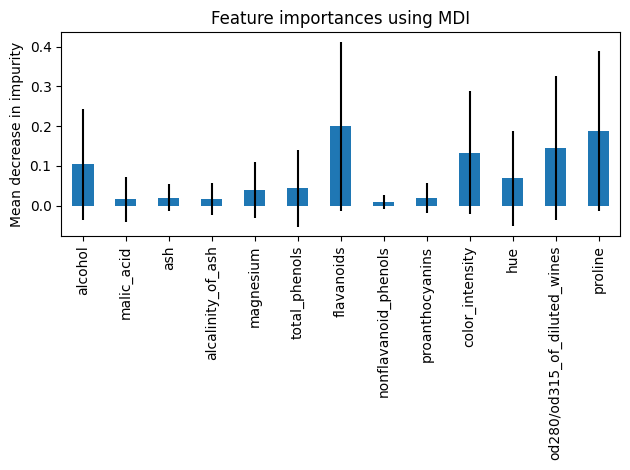

In [32]:


import pandas as pd
import numpy as np
import matplotlib. pyplot as plt

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

__Feature importance based on feature permutation__

Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

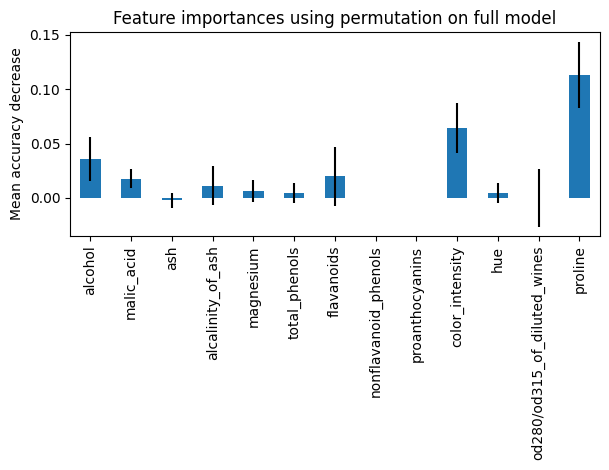

In [34]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Extremely Randomized Trees (extra-tree)
T∆∞∆°ng t·ª± nh∆∞ random forest, kh√°c ·ªü ƒëi·ªÉm thay v√¨ ch·ªçn ng∆∞·ª°ng t·ªëi ∆∞u ƒë·ªÉ split (cut-off split point) ·ªü node nh∆∞ RF th√¨ s·∫Ω ch·ªçn ng·∫´u nhi√™n ·ªü ET.
- Thu·∫≠t to√°n ch·∫°y nhanh h∆°n so v·ªõi RF, n√™n ph√π h·ª£p v·ªõi d·ªØ li·ªáu l·ªõn h∆°n

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier().fit(X_train, y_train)
etc.score(X_test, y_test)

0.9555555555555556

### Bagging meta-estimator
S·ª≠ d·ª•ng estimator b·∫•t k·ª≥ cho ph∆∞∆°ng ph√°p bagging

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)

## Boosting

X√¢y d·ª±ng c√°c model c√πng lo·∫°i, m·ªói model sau s·∫Ω d·ª± ƒëo√°n error c·ªßa model tr∆∞·ªõc, t·∫°o th√†nh chu·ªói model m√† model sau s·∫Ω t·ªët h∆°n model tr∆∞·ªõc.

--> M·ª•c ti√™u l√† gi·∫£m bias - √°p d·ª•ng cho c√°c model c√≥ variance th·∫•p v√† b·ªã bias cao

- Boosting l√† m·ªôt qu√° tr√¨nh tu·∫ßn t·ª±, kh√¥ng th·ªÉ x·ª≠ l√≠ song song, do ƒë√≥, th·ªùi gian train m√¥ h√¨nh c√≥ th·ªÉ t∆∞∆°ng ƒë·ªëi l√¢u.
- Sau m·ªói v√≤ng l·∫∑p, Boosting c√≥ kh·∫£ nƒÉng l√†m gi·∫£m error theo c·∫•p s·ªë nh√¢n.
- Boosting s·∫Ω ho·∫°t ƒë·ªông t·ªët n·∫øu base learner c·ªßa n√≥ kh√¥ng qu√° ph·ª©c t·∫°p c≈©ng nh∆∞ error kh√¥ng thay ƒë·ªïi qu√° nhanh.
- Boosting gi√∫p l√†m gi·∫£m gi√° tr·ªã bias cho c√°c model base learner.

### AdaBoost
Thu·∫≠t to√°n t·ªïng h·ª£p c√°c submodel theo tr·ªçng s·ªë tr√™n to√†n b·ªô data v·ªõi model sau ƒë∆∞·ª£c build tr√™n data ƒë√£ ƒë∆∞·ª£c re-weighting v·ªõi idea tr√™n model tr∆∞·ªõc ƒë√≥, data point n√†o g√¢y ra error l·ªõn th√¨ c√≥ weight cao h∆°n v√† ng∆∞·ª£c l·∫°i.

Tuy nhi√™n v·ªõi d·ªØ li·ªáu c√≥ large error (bias) th√¨ Gradient Boosting hi·ªáu qu·∫£ h∆°n

- AdaBoost can be used both for classification and regression problems

**Procedure**

1. Kh·ªüi t·∫°o ban ƒë·∫ßu v·ªõi tham s·ªë 
- $M$ l√† s·ªë l∆∞·ª£ng submodels, 
- weight c·ªßa $N$ data point ban ƒë·∫ßu $w_0 =\frac{1}{N}$, 
- final model ban ƒë·∫ßu $F_0$ = 0.

2. T·∫°i v√≤ng l·∫∑p th·ª© i:
- Train model $f_i$ ƒë·ªÉ l·∫•y ƒë∆∞·ª£c `minimizes weighted error` $\epsilon_i$ = t·ªïng c√°c tr·ªçng s·ªë $w_i$ c·ªßa c√°c data point b·ªã misclassified (d·ª± ƒëo√°n b·ªã sai). 
- T√≠nh tr·ªçng s·ªë `model_i` theo c√¥ng th·ª©c: $\alpha_i = 0.5*\ln(\frac{1}{\epsilon_i} -1)$
- C·∫≠p nh·∫≠t $w_{i+1}$ cho $N$ datapoint model ti·∫øp theo: 
$w_{i+1(n)} = w_i * e^{- y_n * \alpha_i * f_i(x_n)} $ cho datapoint th·ª© n
- Chu·∫©n ho√° $w_{i+1}$ b·∫±ng c√°ch chia cho t·ªïng $w_{i+1}$ sao cho t·ªïng c·ªßa ch√∫ng = 1
- C·∫≠p nh·∫≠t final model: $F_i = F_{i-1} + \alpha_i * f_i$
- Output khi ch·∫°y model l√† $H = sign(F_M)$
    
FYI: AdaBoost c√≥ th·ªÉ ƒë∆∞·ª£c √°p d·ª•ng m√† kh√¥ng c·∫ßn d·ª±a v√†o vi·ªác ƒë√°nh tr·ªçng s·ªë l·∫°i c√°c ƒëi·ªÉm d·ªØ li·ªáu, thay v√†o ƒë√≥, ch√∫ng ta c√≥ th·ªÉ re-sample ƒë·ªÉ l·∫•y d·ªØ li·ªáu train cho c√°c model ti·∫øp theo d·ª±a v√†o x√°c su·∫•t ƒë∆∞·ª£c x√°c ƒë·ªãnh b·ªõi c√°c tr·ªçng s·ªë.

In [39]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(    
    estimator=None, # thu·∫≠t to√°n k·∫øt h·ª£p v·ªõi pp adaboost, m·∫∑c ƒë·ªãnh l√† decision tree
    n_estimators=50, # s·ªë l∆∞·ª£ng t·ªëi ƒëa estimators s·ª≠ d·ª•ng, n·∫øu v∆∞·ª£t qu√° th√¨ ko qu√° tr√¨nh boosting n·ªØa
    learning_rate=1.0, # h·ªá s·ªë learning rate
)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8666666666666667

### Gradient Boosting
T∆∞∆°ng t·ª± nh∆∞ c√°ch ho·∫°t ƒë·ªông c·ªßa adaboost, thay v√¨ c·∫≠p nh·∫≠t weight c√°c features th√¨ gradient boosting c·∫≠p nh·∫≠t `model m·ªõi` = `model c≈©` + `pseudo-residuals`

Model ti·∫øp theo s·∫Ω fit v√†o `pseudo-residuals` c·ªßa model tr∆∞·ªõc ƒë√≥
$M_{n}=M_{n-1}-\eta{\frac{\partial}{\partial m}}L(M_{n-1})$

### XGBoost
Base tr√™n gradient boosting nh∆∞ng c·∫£i ti·∫øn v·ªÅ m·∫∑t thu·∫≠t to√°n, k·∫øt h·ª£p c·∫£ GPU v√† CPU
- XGBoost c√≥ th·ªÉ ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ gi·∫£i quy·∫øt ƒë∆∞·ª£c t·∫•t c·∫£ c√°c v·∫•n ƒë·ªÅ t·ª´ h·ªìi quy (regression), ph√¢n lo·∫°i (classification), ranking v√† gi·∫£i quy·∫øt c√°c v·∫•n ƒë·ªÅ do ng∆∞·ªùi d√πng t·ª± ƒë·ªãnh nghƒ©a.
- Engineering ƒë·ªÉ tr√°nh overfitting nh∆∞: sub-sampling row, column, column per split levels, √°p d·ª•ng regularized L1 v√† L2.
- Kh·∫£ nƒÉng t·∫≠n d·ª•ng t√†i nguy√™n h·ªá th·ªëng: t√≠nh to√°n song song tr√™n CPU/GPU, t√≠nh to√°n ph√¢n t√°n tr√™n nhi·ªÅu server, t√≠nh to√°n khi t√†i nguy√™n b·ªã gi·ªõi h·∫°n, cache optimization ƒë·ªÉ tƒÉng t·ªëc training.
- V√† cu·ªëi c√πng l√† kh·∫£ nƒÉng x·ª≠ l√Ω missing data value, ti·∫øp t·ª•c training b·∫±ng m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c build tr∆∞·ªõc ƒë√≥ ƒë·ªÉ ti·∫øt ki·ªám th·ªùi gian.

__1. Avoid overfitting__
Overfitting in XGB c√≥ th·ªÉ d·∫´n t·ªõi predict d·ªØ li·ªáu ch∆∞a c√≥ trong t·∫≠p train c√≥ th·ªÉ gi·∫£m ƒë·ªô ch√≠nh x√°c v√† k·∫øt qu·∫£ d·ª± ƒëo√°n c√≥ high variance, unstable. C√°c pp gi·∫£m overfitting:
- __Cross-validation__
- __Regularization__: S·ª≠ d·ª•ng penalty (L1 ho·∫∑c L2) cho cost function. Increasing `alpha` or `lambda` will penalize more complex models and reduce the size of trees that are fit 
    - `reg_alpha` : Manhattan distance (L1 regu)
    - `reg_lambda` : squared Euclidean d√≠tance (L2 regu)
- __Early stopping__:
- __Reduce number of trees__:
- __Reduce number of features selection__:

__2. Hyperparameters__
- `eta/learning_rate`: the alpha in The Boosting Algorithm, if the data has more noisy, reduce the `lr`
- `max_depth`: the maximum depth of leaf, lower maxdepth helps reduce overfitting
- `nrounds/n_estimators`: s·ªë l∆∞·ª£ng t·ªëi ƒëa estimators s·ª≠ d·ª•ng (boosting rounds). N·∫øu lr th·∫•p, n√™n set n_estimators cao do qu√° tr√¨nh h·ªçc ch·∫≠m, update √≠t.
- `subsample`: t·ª∑ l·ªá %rawsample without replacement cho m·ªói 1 round model, ƒë·ªÉ th·∫•p tr√°nh ƒë∆∞·ª£c overfitting
- `colsample_bytree`: t·ª∑ l·ªá %features use for each round model, ƒë·ªÉ th·∫•p tr√°nh ƒë∆∞·ª£c overfitting, h·ªó tr·ª£ cho TH input predict b·ªã thi·∫øu feature
- `lambda/reg_lambda` and `alpha/reg_alpha`: H·ªá s·ªë alpha (Lasso - L1) v√† lambda (Ridge-L2) cho regularization

In [55]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
eval_set = [(X_train, y_train), (X_test, y_test)]

param_grid = {
  "objective": ["binary:logistic"], 
  "booster": ["gbtree"], 
  "max_depth": [3 ] , #[3, 5, 7], # default: 3 only for depthwise
  "n_estimators": [20] , # [500, 1000], # default: 500  
  "learning_rate": [0.05 ] , # [0.1, 0.05, 0.01], # default: 0.05 
  "subsample": [0.6] , #  [0.6, 0.8], 
  "colsample_bytree": [0.6] , #  [0.6, 0.8],
  "colsample_bylevel": [0.6] , #  [0.6, 0.8],
  "random_state": [1],
  'min_child_weight': [11], 
  "eval_metric": ["auc"], 
}
cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=1)

xgb_model = xgb.XGBClassifier()

grid_search = GridSearchCV(xgb_model, param_grid, n_jobs=2, 
                        cv = cv, scoring='roc_auc', verbose=1)

grid_result = grid_search.fit(X_train, y_train, verbose = 0, eval_set=eval_set)
print("Best Score: ", grid_result.best_score_)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Best Score:  0.9807611853320808


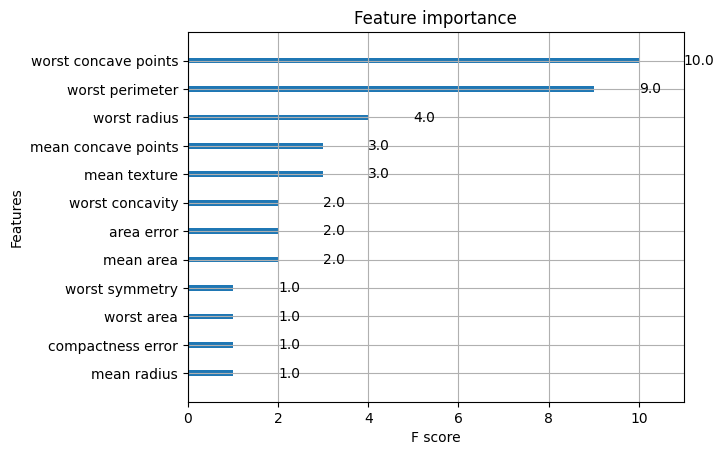

In [47]:
# default plot_importance
from xgboost import plot_importance
plot_importance(grid_search.best_estimator_)
plt.show()

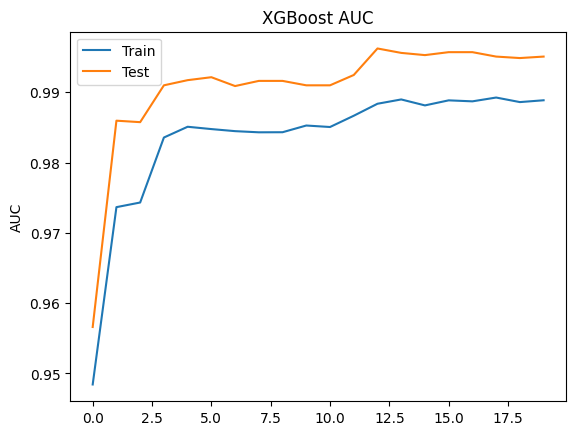

In [56]:
# evaluation plot
# retrieve performance metrics 
results = grid_search.best_estimator_.evals_result()
epochs = len(results['validation_0' ]['auc'])
x_axis = range(0, epochs)
 
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

### LightGBM

__LightGBM__ s·ª≠ d·ª•ng "histogram-based algorithms" thay th·∫ø cho "pre-sort-based algorithms " th∆∞·ªùng ƒë∆∞·ª£c d√πng trong c√°c boosting tool kh√°c ƒë·ªÉ t√¨m ki·∫øm split point trong qu√° tr√¨nh x√¢y d·ª±ng tree. C·∫£i ti·∫øn n√†y gi√∫p LightGBM tƒÉng t·ªëc ƒë·ªô training, ƒë·ªìng th·ªùi l√†m gi·∫£m b·ªô nh·ªõ c·∫ßn s·ª≠ d·ª•ng. C·∫£ xgboost v√† lightgbm ƒë·ªÅu s·ª≠ d·ª•ng histogram-based algorithms, ƒëi·ªÉm t·ªëi ∆∞u c·ªßa lightgbm so v·ªõi xgboost l√† ·ªü 2 thu·∫≠t to√°n: GOSS (Gradient Based One Side Sampling) v√† EFB (Exclusive Feature Bundling) gi√∫p tƒÉng t·ªëc ƒë√°ng k·ªÉ trong qu√° tr√¨nh t√≠nh to√°n. Chi ti·∫øt v·ªÅ GOSS v√† EFB, c√°c b·∫°n c√≥ th·ªÉ ƒë·ªçc th√™m t·∫°i: https://towardsdatascience.com/what-makes-lightgbm-lightning-fast-a27cf0d9785e

__LightGBM__ ph√°t tri·ªÉn tree d·ª±a tr√™n __leaf-wise__, trong khi h·∫ßu h·∫øt c√°c boosting tool kh√°c (k·ªÉ c·∫£ `xgboost`) d·ª±a tr√™n __level-wise__. 
- __Leaf-wise__ ph√°t tri·ªÉn tree theo node ƒëang x√©t cho h·∫øt node ƒë√≥ r·ªìi m·ªõi nh·∫£y sang node ti·∫øp theo ==> n√™n s·ª≠ d·ª•ng `maxdepth` ƒë·ªÉ tr√°nh overfitting. 
- __Leaf-wise__ l·ª±a ch·ªçn n√∫t ƒë·ªÉ ph√°t tri·ªÉn c√¢y d·ª±a tr√™n t·ªëi ∆∞u to√†n b·ªô tree, trong khi __level-wise__ t·ªëi ∆∞u tr√™n nh√°nh ƒëang x√©t (__level-wise__: ph√°t tri·ªÉn theo t·∫ßng c·ªßa tree, khi ph√°t tri·ªÉn h·∫øt t·∫ßng th√¨ m·ªõi nh·∫£y xu·ªëng t·∫ßng ti·∫øp theo.), do ƒë√≥, v·ªõi s·ªë node nh·ªè, c√°c tree x√¢y d·ª±ng t·ª´ __leaf-wise__ th∆∞·ªùng out-perform __level-wise__.

Note: Leaf-wise tuy t·ªët, nh∆∞ng v·ªõi nh·ªØng b·ªô d·ªØ li·ªáu nh·ªè, c√°c tree x√¢y d·ª±ng d·ª±a tr√™n leaf-wise th∆∞·ªùng d·∫´n ƒë·∫øn overfit kh√° s·ªõm. Do ƒë√≥, lightgbm s·ª≠ d·ª•ng th√™m 1 hyperparameter l√† maxdepth nh·∫±m c·ªë g·∫Øng h·∫°n ch·∫ø ƒëi·ªÅu n√†y. D√π v·∫≠y, LightGBM v·∫´n ƒë∆∞·ª£c khuy·∫øn kh√≠ch s·ª≠ d·ª•ng khi b·ªô d·ªØ li·ªáu l√† ƒë·ªß to.

__L·ª±a ch·ªçn LightGBM thay cho XGBoost__:
- D·ªØ li·ªáu l·ªõn
- Nhi·ªÅu categorical features
- ∆Øu ti√™n t·ªëc ƒë·ªô h∆°n performance model
- Kh·∫Øc ph·ª•c v·∫•n ƒë·ªÅ training l√¢u cho d·ªØ li·ªáu l·ªõn c·ªßa XGboost

## Stacking

X√¢y d·ª±ng c√°c base-model kh√°c lo·∫°i train tr√™n c√πng 1 b·ªô d·ªØ li·ªáu t·∫°o th√†nh 1 meta model, train c√°c model n√†y ƒë·ªôc l·∫≠p sau ƒë√≥ s·∫Ω t√¨m c√°ch k·∫øt h·ª£p/ ho·∫∑c x√¢y d·ª±ng 1 metamodel ƒë·ªÉ predict output t·ª´ input l√† output c·ªßa c√°c base-model

--> M·ª•c ti√™u l√† gi·∫£m bias - √°p d·ª•ng cho c√°c model c√≥ variance th·∫•p v√† b·ªã bias cao

**1. Level-model**
- __Level 0 (base model)__: M√¥ h√¨nh c∆° s·ªü h·ªçc tr·ª±c ti·∫øp t·ª´ b·ªô d·ªØ li·ªáu v√† ƒë∆∞a ra d·ª± ƒëo√°n cho m√¥ h√¨nh level-1
    - C√°c base-models c√≥ nh·ªØng c√°ch h·ªçc kh√°c nhau tr√™n b·ªô d·ªØ li·ªáu, cho n√™n outputs hay errors c·ªßa c√°c base-models l√† kh√¥ng t∆∞∆°ng quan (uncorrelated) hay c√≥ ƒë·ªô t∆∞∆°ng quan th·∫•p (low correlation).
    - ƒê·∫ßu ra c·ªßa base-models c√≥ th·ªÉ l√† gi√° tr·ªã th·ª±c (cho b√†i to√°n H·ªìi quy) ho·∫∑c l√† c√°c x√°c su·∫•t c·ªßa nh√£n trong b√†i to√°n ph√¢n lo·∫°i.
    - Base-models th∆∞·ªùng ph·ª©c t·∫°p v√† ƒëa d·∫°ng, m·ªói m√¥ h√¨nh c√≥ c√°ch h·ªçc v√† gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ kh√°c nhau v·ªõi c√πng m·ªôt b√†i to√°n nh∆∞: Decision Tree, SVM, Neural Network,... v√† k·ªÉ c·∫£ l√† c√°c thu·∫≠t to√°n ensemble kh√°c nh∆∞ GBM, Random Forest,...
- __Level 1 (meta model)__:M√¥ h√¨nh h·ªçc t·ª´ c√°c d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh c∆° s·ªü (level-0) ho·∫∑c c√≥ th·ªÉ k·∫øt h·ª£p th√™m input c·ªßa base model, Meta-model th∆∞·ªùng ƒë∆°n gi·∫£n:
    - Linear Regression cho b√†i to√°n Regression -> Tr·∫£ v·ªÅ s·ªë th·ª±c
    - Logistic Regression cho b√†i to√°n Classification -> Tr·∫£ v·ªÅ x√°c su·∫•t c√°c label
    
**Thu·∫≠t to√°n stacking**
- Kh·ªüi t·∫°o ban ƒë·∫ßu:
    - Dataset = Train + Test
    - Train = k-fold
    - Set base-models (M) - level 0
    - Strong-model (H) - level 1
- V·ªõi m·ªói base-model (m) trong set base-models (M):
    - V·ªõi m·ªói fold, train model m trong k-1 fold c√≤n l·∫°i v√† predict fold ƒë√≥. Sau k vong l·∫∑p, thu ƒë∆∞·ª£c k-fold predicted t·ª´ k model (c√πng 1 base-model) m√† k·∫øt qu·∫£ predict n√†y kh√¥ng xu·∫•t hi·ªán ƒë·ªÉ train model (tr√°nh ƒë∆∞·ª£c overfitting).  k-fold predicted n√†y s·∫Ω s·ª≠ d·ª•ng l√†m 1 feature trong train-dataset cho model H.
    - L·∫•y to√†n b·ªô d·ªØ li·ªáu trong train data ƒë·ªÉ train model th·ª© k+1 (c√πng base-model) v√† predict test data, k·∫øt qu·∫£ thu ƒë∆∞·ª£c l√†m 1 feature trong test-dataset cho model H
- L·∫∑p l·∫°i v·ªõi c√°c M-1 base model kh√°c thu ƒë∆∞·ª£c t·ªïng c·ªông M feature c·ªßa train v√† M feature c·ªßa test dataset cho model H

M·ªôt s·ªë bi·∫øn th·ªÉ trong c√°ch tri·ªÉn khai:
- K·∫øt h·ª£p 1 s·ªë features c·ªßa base-model + predicted base-model = tranining dataset c·ªßa meta-model
- Thay v√¨ s·ª≠ d·ª•ng to√†n b·ªô train dataset ƒë·ªÉ build base-model th·ª© k+1 v√† predict test dataset th√¨ s·ª≠ d·ª•ng k-model t·ª´ k-fold ƒë·ªÉ predict lu√¥n test dataset, thu ƒë∆∞·ª£c k b·ªô d·ª± ƒëo√°n v·ªÅ test dataset. Ph∆∞∆°ng ph√°p t·ªïng h·ª£p k·∫øt qu·∫£ c·ªßa k b·ªô d·ª± ƒëo√°n test dataset l√† n·∫øu b√†i to√°n regression th√¨ d√πng mean, N·∫øu b√†i to√°n Classification th√¨ c√πng max-voting
- Multi-levels Stacking: TƒÉng th√†nh 3 level model, tuy nhi√™n kh√¥ng s·ª≠ d·ª•ng k-fold, th√¨ s·ªë l∆∞·ª£ng d·ªØ li·ªáu c·∫ßn d√πng l√† r·∫•t nhi·ªÅu, v√¨ hi·ªán t∆∞·ª£ng overfitting r·∫•t d·ªÖ x·∫£y ra, nh∆∞ng n·∫øu s·ª≠ d·ª•ng k-fold, th√¨ th·ªùi gian hu·∫•n luy·ªán l√† c·ª±c k√¨ t·ªën k√©m.

**Stacking family**
___1. Voting ensemble___

Thay v√¨ s·ª≠ d·ª•ng 1 meta-model (level 1) th√¨ s·ª≠ d·ª•ng c√°c ph∆∞∆°ng ph√°p l·ª±a ch·ªçn output ƒë∆°n gi·∫£n h∆°n:
- Trong b√†i to√°n Regression, Voting ƒë∆∞a ra mean ho·∫∑c median c·ªßa c√°c predictions t·ª´ c√°c base-models
- Trong b√†i to√°n Classification, Voting s·∫Ω s·ª≠ d·ª•ng Hard-voting (Class ƒë∆∞·ª£c predicted nhi·ªÅu nh·∫•t) ho·∫∑c Soft-voting (Class c√≥ t·ªïng x√°c su·∫•t ƒë∆∞·ª£c predicted l√† cao nh·∫•t)
Trong Voting, t·∫•t c·∫£ c√°c base-models ƒë∆∞·ª£c gi·∫£ ƒë·ªãnh c√≥ c√πng ƒë·ªô quan tr·ªçng nh∆∞ nhau, c√πng hi·ªáu nƒÉng nh∆∞ nhau, 

___2. Weighted Average Ensemble___

ƒêi·ªÅu ch·ªânh Voting ensemble b·∫±ng vi·ªác th√™m weighted cho base-model d·ª±a tr√™n ƒë·ªô ch√≠nh x√°c ho·∫∑c t·ª± build 1 process ƒë·ªÉ t·ªëi ∆∞u tr·ªçng s·ªë

___3. Blending Ensemble___

Thay ƒë·ªïi stacking b·∫±ng c√°ch thay v√¨ s·ª≠ d·ª•ng cross-validation ·ªü training set th√¨ chia training set th√†nh `train set` + `validation set`:
- `Trainset` d√πng ƒë·ªÉ train base model, sau ƒë√≥ predict t·∫°i `validationset`
- `Validationset` + prediction `validationset` (base-model) s·∫Ω l√†m input (__set1__) cho meta-model
- `Test set` v√† c√°c k·∫øt qu·∫£ d·ª± ƒëo√°n tr√™n `test set` c·ªßa c√°c base models ƒë∆∞·ª£c s·ª≠ d·ª•ng nh∆∞ l√† `test set` (__set2__) c·ªßa blending model.
- Train v√† ƒë√°nh gi√° blending model s·ª≠ d·ª•ng __set1__ v√† __set2__.

___4. Super Learner Ensemble___

![image.png](_images/4_ML_Algorithms/SuperLearnerEnsemble.png)

In [59]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# load data
X_train, X_test, y_train, y_test = train_test_split(*load_diabetes(return_X_y=True))

# setup base model (level 0)
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]

# setup meta model (level1)
# The final_estimator will use the predictions of the estimators as input
final_estimator = GradientBoostingRegressor(n_estimators=25, subsample=0.5, 
                                            min_samples_leaf=25, max_features=1,)
reg = StackingRegressor(estimators, final_estimator)
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.42738455065984304

In [62]:
# multi layer stacking

from sklearn.ensemble import RandomForestRegressor

multi_layer_regressor = StackingRegressor(
    estimators=[('ridge', RidgeCV()),
                ('lasso', LassoCV()),
                ('knr', KNeighborsRegressor(n_neighbors=20,
                                            metric='euclidean'))],
    final_estimator=StackingRegressor(
        estimators=[('rf', RandomForestRegressor(n_estimators=10, max_features=2)),
                    ('gbrt', GradientBoostingRegressor(n_estimators=10, max_features=2))],
        final_estimator=RidgeCV()
    )
)
multi_layer_regressor.fit(X_train, y_train)
multi_layer_regressor.score(X_test, y_test)

0.41430511335119347

# Multi-class and multi-output
[Chi ti·∫øt](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification)
(updating)

# Neural network models

## Extreme Learning Machine (ELM)

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from scipy.special import expit
from sklearn.model_selection import train_test_split

class ELMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, node, activation_func, output_node='softmax', faster=None, C=None, p=None, random_state=None):
        self.no_node = node
        
        self.af = activation_func
        if self.af not in ['relu','sig','sin','hardlim','new']:
            raise ValueError('Parameter Activation function must be one in [relu, sig, sin, hardlim, new]')
            
        self.output_node = output_node
        if self.output_node not in ['sig','softmax']:
            raise ValueError('Parameter Activation function must be one in [relu, sig, sin, hardlim, new]')
        
        self.faster = faster
        if self.faster not in [None,1,2]:
            raise ValueError('Parameter faster must be one in [None, 1, 2]')
        
        self.C = C
        if self.faster != None:
            if C == None: 
                raise ValueError('Missing regularization value C')
        
        self.p = p
        if (self.af == 'new'): 
            if p == None:
                raise ValueError('Missing p for new activation function')
            else:
                self.p = int(p)

        self.random_state = random_state
        
    def fit(self, X, y):
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Check the unique classes seen during fit
        self.classes_ = unique_labels(y)
        self.y_ = OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
        
        # Initiate random input weights and bias
        if self.random_state != None:
            np.random.seed(self.random_state)
        
        self.input_weights = np.random.normal(size=[X.shape[1],self.no_node])
        self.biases = np.random.normal(size=[self.no_node])
        
        # The smallest norm least square solution
        H = self.hidden_nodes(X)
        if self.faster == 1:
            self.output_weights = H.T @ np.linalg.inv(np.identity(X.shape[0])/self.C + H @ H.T) @ self.y_
        elif self.faster == 2:
            self.output_weights = np.linalg.inv(np.identity(self.no_node)/self.C + H.T @ H) @ H.T @ self.y_
        else:
            self.output_weights = np.dot(np.linalg.pinv(H), self.y_)
    
    def relu(self, x):
        return np.maximum(x, 0, x)
    
    def sin(self, x):
        return np.sin(x)
    
    def hardlim(self, x):
        x = np.array(x)
        return np.where(x >= 0, 1, 0)

    def sigmoid(self, x):
        return expit(x) # 1/(1+np.exp(-x)) RuntimeWarning: overflow encountered in exp
    
    def new(self, x, p):
        return x/(1 + x**(4*p-2))**(1/(4*p-2))
        
    def softmax(self, x):
        return np.exp(x)/np.sum(np.exp(x), 1).reshape(-1,1)
    
        
    def hidden_nodes(self, X):
        G = np.dot(X, self.input_weights) + self.biases
        if self.af == 'relu':
            H = self.relu(G)
        elif self.af == 'sig':
            H = self.sigmoid(G)
        elif self.af == 'sin':
            H = self.sin(G)
        elif self.af == 'hardlim':
            H = self.hardlim(G)
        elif self.af == 'new':
            H = self.new(G)
            
        return H
    
    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)
        # Input validation
        X = check_array(X)
        
        prediction = np.argmax(np.dot(self.hidden_nodes(X), self.output_weights),1)
        
        return prediction
    
    def predict_proba(self, X, mode='softmax'):
        # Check is fit had been called
        check_is_fitted(self)
        # Input validation
        X = check_array(X)
        
        prediction = np.dot(self.hidden_nodes(X), self.output_weights)
        if self.output_node == 'softmax':
            proba = self.softmax(prediction) # Use softmax function to convert to probability, calculating for different classes' output
        elif self.output_node == 'sig':
            proba = self.sigmoid(prediction[:,1]) # Use sigmoind function to convert to probability from a real value (for binary classification ONLY, output just for positive class
  
        return proba
    
    def get_params(self, deep=False):
        return {'node':self.no_node,
                'activation_func':self.af,
                'faster':'self.faster', 
                'C':self.C, 
                'p':self.p, 
                'random_state':self.random_state}

In [ ]:
class EELMClassifier(ELMClassifier):
    def __init__(self, node, activation_func, output_node='softmax', faster=None, C=None, p=None, no_bat=20, alpha=0.5, gamma=0.5, max_iter=100, freq_min=0, freq_max=10):
        super().__init__(node, activation_func, output_node, faster, C, p)
        
        self.bat_pop = no_bat # Population of bats
        self.max_iter = max_iter
        
        # Parameters for random walk
        self.alpha = alpha
        self.gamma = gamma
        
        # Range of Frequency
        self.freq_min = freq_min
        self.freq_max = freq_max
        
        
    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Check the unique classes seen during fit
        self.X_ = X
        self.classes_ = unique_labels(y)
        self.y_ = OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
        
        # Initialization parameter for BA
        self.dim = self.no_node*X.shape[1] + self.no_node # Dimension of Pos
        self.freq = np.zeros(self.bat_pop)
         
        self.Pos = np.random.rand(self.bat_pop,self.dim) # Store Positions: each row is Pos of a bat
        self.Vel = np.random.rand(self.bat_pop,self.dim) # Store Velocity: each row is Vel of a bat for the defined dimension
        self.L = np.random.rand(self.bat_pop) # Initiate Loudness for each bat
        self.r_init = np.random.rand(self.bat_pop) # Initiate Pulse emission rate for each bat
        self.r = self.r_init
        
        # Store the best solution
        self.fitness = np.zeros(shape=(self.max_iter, self.bat_pop)) # Store fitness for each bat's Pos as row
        self.best = np.zeros(shape=(self.max_iter, self.dim)) # Store the best Pos that minimizes the fitness as row
        self.f_min = np.zeros(self.max_iter) # Store fitness value for the best Pos
        
        self.final_Pos, self.final_rmse = self.generate_pos()
        
        self.input_weights = self.final_Pos[:-self.no_node].reshape(X.shape[1], self.no_node)
        self.biases = self.final_Pos[-self.no_node:]
        
        # The smallest norm least square solution
        H = self.hidden_nodes(X)
        if self.faster == 1:
            self.output_weights = H.T @ np.linalg.inv(np.identity(X.shape[0])/self.C + H @ H.T) @ self.y_
        elif self.faster == 2:
            self.output_weights = np.linalg.inv(np.identity(self.no_node)/self.C + H.T @ H) @ H.T @ self.y_
        else:
            self.output_weights = np.dot(np.linalg.pinv(H), self.y_)
    
    def best_bat(self,t):
        # t: t_th iteration
        best_bat = np.argmin(self.fitness[t]) # Get the bat with best fitness
        self.best[t] = self.Pos[best_bat] # Store its Pos
        self.f_min[t] = self.fitness[t, best_bat] # Store its fitness value
     
    def generate_pos(self):
        t = 0
        while t < self.max_iter:
            for i in range(self.bat_pop):
                r = np.random.rand() # Random value from a uniform distribution over [0, 1)
                self.freq[i] = self.freq_min + (self.freq_max - self.freq_min)*r
                self.Vel[i] = self.Vel[i] + (self.Pos[i] - self.best[t])*self.freq[i]
                self.Pos[i] = self.Pos[i] + self.Vel[i]
                # Update fitness
                self.fitness[t, i] = self.rmse(self.Pos[i], 1)          
            
            # Get the best solution
            self.best_bat(t)
            
            # Random walk procedure
            epsilon = np.random.uniform(-1, 1)
            for i in range(len(self.L)):
                self.Pos[i] = self.Pos[i] + epsilon*self.L[i]
            
            self.L = self.alpha*self.L
            self.r = self.r_init*(1-np.exp(-self.gamma*t))
            
            t += 1
        
        return self.best[np.argmin(self.f_min)], np.min(self.f_min)
    
    def rmse(self, Pos, random_state):
        # Split train:test = 9:1
        X_train, X_test, y_train, y_test = train_test_split(self.X_, self.y_, test_size=0.1, stratify=self.y_, random_state=random_state)
        
        input_weights = Pos[:-self.no_node].reshape(X_train.shape[1], self.no_node)
        biases = Pos[-self.no_node:]
        
        #train
        G = np.dot(X_train, input_weights) + biases
        if self.af == 'relu':
            H = self.relu(G)
        elif self.af == 'sig':
            H = self.sigmoid(G)
        elif self.af == 'sin':
            H = self.sin(G)
        elif self.af == 'hardlim':
            H = self.hardlim(G)
        elif self.af == 'new':
            H = self.new(G)
        
        if self.faster == 1:
            output_weights = H.T @ np.linalg.inv(np.identity(X.shape[0])/self.C + H @ H.T) @ y_train
        elif self.faster == 2:
            output_weights = np.linalg.inv(np.identity(self.no_node)/self.C + H.T @ H) @ H.T @ y_train
        else:
            output_weights = np.dot(np.linalg.pinv(H), y_train)
        
        #validate
        G_val = np.dot(X_test, input_weights) + biases
        if self.af == 'relu':
            H_val = self.relu(G_val)
        elif self.af == 'sig':
            H_val = self.sigmoid(G_val)
        elif self.af == 'sin':
            H_val = self.sin(G_val)
        elif self.af == 'hardlim':
            H = self.hardlim(G_val)
        elif self.af == 'new':
            H_val = self.new(G_val)
        
        T_hat = np.dot(H_val, output_weights)
        
        return np.linalg.norm(T_hat - y_test)
    
    def get_params(self, deep=False):
        return {'node':self.no_node,
                'activation_func':self.af,
                'faster':'self.faster', 
                'C':self.C, 
                'p':self.p, 
                'no_bat':self.bat_pop, 
                'alpha':self.alpha, 
                'gamma':self.gamma, 
                'max_iter':self.max_iter, 
                'freq_min':self.freq_min, 
                'freq_max':self.freq_max}

## Multi-layer Perceptron (MLP)

S·ª≠ d·ª•ng ki·∫øn tr√∫c m·∫°ng neural network nhi·ªÅu hidden layer v·ªõi input m chi·ªÅu (m node + 1 bias node t·∫°i input layer) v√† output l√† o chi·ªÅu (o node t·∫°i outpput layer), √°p d·ª•ng cho model linear & non-linear classification v√† regression 
<img src="https://i.ibb.co/vw8GWsy/MLP.jpg" width="500"> 
_Note_: NN in sklearn not support GPU trainning

__Pros__:
- Capability to learn non-linear models.
- Capability to learn models in real-time (on-line learning) using `partial_fit`.

__Cons__:
- MLP v·ªõi hidden layers c√≥ h√†m a non-convex loss th√¨ c√≥ th·ªÉ c√≥ nhi·ªÅu h∆°n 1 local minimum. D·∫´n t·ªõi vi·ªác c√≥ th·ªÉ c√≥ s·ª± sai kh√°c trong qu√° tr√¨nh training t·∫°i c√°c ƒëi·ªÉm startpoint ban ƒë·∫ßu kh√°c nhau
- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
- MLP is sensitive to feature scaling.

**1. Regularization**

Both `MLPRegressor` and `MLPClassifier` use parameter $\alpha$ for regularization (L2 regularization) term which helps in avoiding overfitting by penalizing weights with large magnitudes.

**2. Hidden layer size** `hidden_layer_sizes`
- S·ªë hidden layers
- S·ªë node m·ªói hidden layer 
 
|<img src="https://qph.fs.quoracdn.net/main-qimg-65fa680a5effca84096237df3eb4ae88" width =400>|
|:--:|

- In `sklearn.neural_network.MLPClassifier`
    - `hidden_layer_sizes` = (9): 1 hidden layer v·ªõi 9 node
    - `hidden_layer_sizes` = (9, 7, 4): 3 hidden layers v·ªõi l·∫ßn l∆∞·ª£t 9,7 and 4 node
    - default (100,):  1 hidden layer v·ªõi 100 neurons/node

`clf = MLPClassifier(hidden_layer_sizes=(9, 9,9))`

**3. Algorithms** (`solver`)

C√°c ph∆∞∆°ng ph√°p update weight:

- `sgd` | __SGD__(supports online and mini-batch learning): weight ƒë∆∞·ª£c update theo h√†m loss v√† learning rate
$$w\leftarrow w-\eta(\alpha\frac{\partial R(w)}{\partial w}+\frac{\partial L o s s}{\partial w})$$
__SGD__ with momentum or nesterov‚Äôs momentum, on the other hand, can perform better than those two below algorithms if `learning rate` is correctly tuned.

- `adam`__Adam__(supports online and mini-batch learning)(default): Adam k·∫øt h·ª£p s·ª± thay ƒë·ªïi momentum d·ª±a theo gradient b·∫≠c 1 v√† b·∫≠c 2 . __Adam__ is very robust for relatively large datasets

- `lbfgs` | __L-BFGS__(not supports online and mini-batch learning) is a solver that approximates the Hessian matrix which represents the second-order partial derivative of a function. __L-BFGS__ converges faster and with better solutions on small datasets. Thu·∫≠t to√°n s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p quasi-Newton methods ƒë·ªÉ t√¨m nghi·ªám c·ªßa ƒëi·ªÉm t·ªëi ∆∞u

**4. Activation functions** (`activation`)

- `identity`: simply returns $f(x) = x$
- `logistic`: the logistic sigmoid function, returns $f(x) = 1 / (1 + \exp(-x))$
- `tanh`: the hyperbolic tan function, returns $f(x) = \tanh(x)$
- `relu` (default):   the rectified linear unit function, returns $f(x) = \max(0, x)$

**5. Learning Rate**
- Sklearn supports __learning rates__  when solver=`sgd`
    - `constant`: a constant,  given by `learning_rate_init=0.001`.
    - `invscaling`: Gi·∫£m t·ª´ t·ª´ sau m·ªói 1 epoch train
    - `adaptive`: 

**6. Tips**
- highly recommended to scale your data
- Find best $\alpha$ in range $[10^{-6}, 10^{-1}]$ by gridsearch
- If you want more control over stopping criteria or learning rate in __SGD__, or want to do additional monitoring, using `warm_start`=True and `max_iter`=1

### MLP Classification
Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

In [82]:
import numpy as np
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

In [79]:
# data and preprocessing
def prepro_data():
    # load data
    df = pd.read_csv('Datasets/adult.csv' ).replace("?", np.nan)

    # X and y
    y = df['income'].apply(lambda x:0 if x=='<=50K' else 1)
    X = df.drop(['income'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # preprocessing
    preprocessor = ColumnTransformer([
        ('ohe', OneHotEncoder(handle_unknown= 'infrequent_if_exist'), make_column_selector(dtype_exclude=np.number)),
        ('scaler', MinMaxScaler(), make_column_selector(dtype_include=np.number))
    ]
    )

    X_train = preprocessor.fit_transform(X_train, y_train)
    X_test = preprocessor.transform(X_test)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = prepro_data()

In [83]:
# setup estimator
clf = MLPClassifier(random_state=1,  max_iter=3000)

parameter_grid = {
    'hidden_layer_sizes': [(3), # 1 hidden layer with 3 nodes   
                           (3,3) # 2 hidden layer with 3 nodes each layer
                          ], 
}

gs = GridSearchCV(clf, parameter_grid,  cv=5)
gs = gs.fit(X_train,y_train)

#set the clf to the best combination of parameters
clf_best = gs.best_estimator_
print("best model:", clf_best.get_params())
# Fit the best model to the data. 
clf_best = clf_best.fit(X_train, y_train)

accuracy_score(y_test, clf_best.predict(X_test))

0.8605793837649708

### MLP Regression
Class `MLPRegressor` trains s·ª≠ d·ª•ng __backpropagation__ with no activation function in the output layer, m√† t·∫°i ƒë√≥ c√≥ th·ªÉ s·ª≠ d·ª•ng h√†m customize ƒë·ªÉ ƒë·∫°t ƒë∆∞·ª£c output mong mu·ªën. V√¨ th·∫ø n√≥ s·ª≠ d·ª•ng the square error nh∆∞ l√† loss function, v√† the output l√† gi√° tr·ªã continuous.

MLPRegressor also supports multi-output regression, in which a sample can have more than one target.